## La previsión de la demanda.
La previsión de la demanda es la técnica que consiste en estimar la demanda futura de los consumidores durante un determinado periodo de tiempo utilizando datos e información históricos.

El cliente nos proporciona un libro de excel con determinado numero de hojas donde se encuentra la actividad de la empresa en los ultimos 5 años. Nos solicita la previsión de la demanda de una semana futura.

In [2]:
#importamos pandas despues de instalarlo con !pip install pandas
#guardamos el excel e una variable juntando toda la información junta.

import pandas as pd
df = pd.concat(pd.read_excel('Peski.xlsx', sheet_name = None ), ignore_index = True )

In [3]:
df

Manifest Date From StationCode To StationCode     Connote #
0      2018-01-01 06:25:11           GB7103         ES0960  710310154455
1      2018-01-01 09:55:09           GB7103         ES0960  710310153744
2      2018-01-01 10:40:06           GB7103         ES0960  710310154820
3      2018-01-01 10:40:09           GB7103         ES0960  710310154831
4      2018-01-01 10:55:10           GB7103         ES0960  710310154864
...                    ...              ...            ...           ...
404724 2022-10-31 12:25:25           GB7103         ES0960  710314529901
404725 2022-10-31 12:26:02           SKYRTN         ES0960  720134964975
404726 2022-10-31 12:40:39           SKYRTN         ES0960  720134965222
404727 2022-10-31 12:41:25           GB7103         ES0960  710314529912
404728 2022-10-31 12:55:26           GB7103         ES0960  710314529912

[404729 rows x 4 columns]

## Tratamos los datos.
Es el momento de pedir información a nuestro DataFrame y filtrar lo que necesitamos. Los graficos es una buena manera de visualizar estos datos.

In [25]:
# vemos una columna datetime 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404729 entries, 0 to 404728
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Manifest Date     404729 non-null  datetime64[ns]
 1   From StationCode  404729 non-null  object        
 2   To StationCode    404729 non-null  object        
 3   Connote #         404729 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 12.4+ MB


Podemos observar 404728 filas y 4 columnas. 

In [21]:
# vemos dos estaciones de destino, una con el doble de trabajo.
df['To StationCode'].value_counts()

ES0160    275742
ES0960    128987
Name: To StationCode, dtype: int64

In [8]:
# agregamos dos columnas mas a nuestro DataFame con la fecha y la horas separadas
df['new_date'] = [d.date() for d in df['Manifest Date']]
df['new_time'] = [d.time() for d in df['Manifest Date']]
df

Manifest Date From StationCode To StationCode     Connote #  \
0      2018-01-01 06:25:11           GB7103         ES0960  710310154455   
1      2018-01-01 09:55:09           GB7103         ES0960  710310153744   
2      2018-01-01 10:40:06           GB7103         ES0960  710310154820   
3      2018-01-01 10:40:09           GB7103         ES0960  710310154831   
4      2018-01-01 10:55:10           GB7103         ES0960  710310154864   
...                    ...              ...            ...           ...   
404724 2022-10-31 12:25:25           GB7103         ES0960  710314529901   
404725 2022-10-31 12:26:02           SKYRTN         ES0960  720134964975   
404726 2022-10-31 12:40:39           SKYRTN         ES0960  720134965222   
404727 2022-10-31 12:41:25           GB7103         ES0960  710314529912   
404728 2022-10-31 12:55:26           GB7103         ES0960  710314529912   

          new_date  new_time  
0       2018-01-01  06:25:11  
1       2018-01-01  09:55:09  
2       2018-01-01  10:40:06  
3       2018-01-01  10:40:09  
4       2018-01-01  10:55:10  
...            ...       ...  
404724  2022-10-31  12:25:25  
404725  2022-10-31  12:26:02  
404726  2022-10-31  12:40:39  
404727  2022-10-31  12:41:25  
404728  2022-10-31  12:55:26  

[404729 rows x 6 columns]

In [28]:
# separamos los datos de las dos estaciones para trabajar por separado.
es0160 = df["To StationCode"] ==  'ES0160'
df_160 = df[es0160]
df_160

Manifest Date From StationCode To StationCode     Connote #  \
15861  2018-04-09 20:00:00           GB0064         ES0160   56466208400   
16041  2018-04-10 20:00:00           GB0064         ES0160    6486915536   
16078  2018-04-11 16:00:00           GB0064         ES0160   56466335402   
16079  2018-04-11 16:00:00           GB0064         ES0160   56466334385   
16080  2018-04-11 16:00:00           GB0064         ES0160   56466328085   
...                    ...              ...            ...           ...   
404645 2022-10-28 23:00:00           IT0073         ES0160  007391116430   
404646 2022-10-28 23:00:00           IT0073         ES0160  007391116513   
404692 2022-10-30 15:00:00           GB0064         ES0160  006454273814   
404709 2022-10-31 09:51:39           BG0129         ES0160  012990024512   
404710 2022-10-31 09:51:39           BG0129         ES0160  012990024513   

          new_date  new_time  
15861   2018-04-09  20:00:00  
16041   2018-04-10  20:00:00  
16078   2018-04-11  16:00:00  
16079   2018-04-11  16:00:00  
16080   2018-04-11  16:00:00  
...            ...       ...  
404645  2022-10-28  23:00:00  
404646  2022-10-28  23:00:00  
404692  2022-10-30  15:00:00  
404709  2022-10-31  09:51:39  
404710  2022-10-31  09:51:39  

[275742 rows x 6 columns]

In [29]:
es0960 = df["To StationCode"] ==  'ES0960'
df_960 = df[es0960]
df_960

Manifest Date From StationCode To StationCode     Connote #  \
0      2018-01-01 06:25:11           GB7103         ES0960  710310154455   
1      2018-01-01 09:55:09           GB7103         ES0960  710310153744   
2      2018-01-01 10:40:06           GB7103         ES0960  710310154820   
3      2018-01-01 10:40:09           GB7103         ES0960  710310154831   
4      2018-01-01 10:55:10           GB7103         ES0960  710310154864   
...                    ...              ...            ...           ...   
404724 2022-10-31 12:25:25           GB7103         ES0960  710314529901   
404725 2022-10-31 12:26:02           SKYRTN         ES0960  720134964975   
404726 2022-10-31 12:40:39           SKYRTN         ES0960  720134965222   
404727 2022-10-31 12:41:25           GB7103         ES0960  710314529912   
404728 2022-10-31 12:55:26           GB7103         ES0960  710314529912   

          new_date  new_time  
0       2018-01-01  06:25:11  
1       2018-01-01  09:55:09  
2       2018-01-01  10:40:06  
3       2018-01-01  10:40:09  
4       2018-01-01  10:55:10  
...            ...       ...  
404724  2022-10-31  12:25:25  
404725  2022-10-31  12:26:02  
404726  2022-10-31  12:40:39  
404727  2022-10-31  12:41:25  
404728  2022-10-31  12:55:26  

[128987 rows x 6 columns]

In [33]:
print(len(df['new_date'].value_counts()))
print(len(df_160['new_date'].value_counts()))
print(len(df_960['new_date'].value_counts()))

1765
1332
1764


## Conclusiones iniciales
El nodo 160 se abrio mas tarde que el 960 pero le supero en volumen de trabajo llegando a doblar su actividad.
Ahora tenemos 3 DataFrames. El primero con la actividad total, y otros dos divididos por estaciones de destino. Los tres tienen columnas añadidas, data y time.

In [35]:
# creamos un nuevo excel y lo guardamos para futuras 
new_date = df_160['new_date'].value_counts()
new_date.to_excel('date_160.xlsx')

In [44]:
# lo mismo con el otro
new_date = df_960['new_date'].value_counts()
new_date.to_excel('date_960.xlsx')

In [10]:
# lo mismo con el otro
new_date = df['new_date'].value_counts()
new_date.to_excel('date_total.xlsx')

In [19]:
# lo mismo con este
date_160 = pd.read_excel('date_160.xlsx')
date_160

Unnamed: 0  new_date
0    2020-12-07      1762
1    2022-06-07      1755
2    2022-06-06      1434
3    2020-12-09      1228
4    2020-12-10      1178
...         ...       ...
1327 2021-06-13         1
1328 2021-07-10         1
1329 2021-09-11         1
1330 2021-09-18         1
1331 2018-04-09         1

[1332 rows x 2 columns]

In [20]:
# lo mismo con este
date_total = pd.read_excel('date_total.xlsx')
date_total

Unnamed: 0  new_date
0    2020-12-07      1903
1    2022-06-07      1873
2    2022-06-06      1531
3    2020-12-09      1376
4    2020-11-30      1312
...         ...       ...
1760 2018-10-27         2
1761 2018-06-23         2
1762 2019-09-07         1
1763 2019-01-05         1
1764 2019-08-03         1

[1765 rows x 2 columns]

In [21]:
# lo ordenamos por fechas y renomblamos las cabezeras.
date_total_ordenado=date_total.sort_values(by='Unnamed: 0') 
date_total_ordenado.columns = ['date','unidad']
date_total_ordenado

date  unidad
1701 2018-01-01       8
527  2018-01-02     306
1221 2018-01-03      88
267  2018-01-04     421
812  2018-01-05     210
...         ...     ...
809  2022-10-27     211
663  2022-10-28     263
1465 2022-10-29      28
1578 2022-10-30      18
1406 2022-10-31      36

[1765 rows x 2 columns]

In [22]:
# lo ordenamos por fechas y renomblamos las cabezeras.
date_160_ordenado=date_160.sort_values(by='Unnamed: 0') 
date_160_ordenado.columns = ['date','unidad']
date_160_ordenado

date  unidad
1331 2018-04-09       1
1313 2018-04-10       1
1043 2018-04-11      66
766  2018-04-13     137
858  2018-04-16     109
...         ...     ...
255  2022-10-26     326
728  2022-10-27     148
494  2022-10-28     225
1308 2022-10-30       1
1302 2022-10-31       2

[1332 rows x 2 columns]

In [23]:
# lo ordenamos por fechas y renomblamos las cabezeras.
date_960_ordenado=date_960.sort_values(by='Unnamed: 0') 
date_960_ordenado.columns = ['date','unidad']
date_960_ordenado

date  unidad
1689 2018-01-01       8
29   2018-01-02     306
504  2018-01-03      88
10   2018-01-04     421
50   2018-01-05     210
...         ...     ...
903  2022-10-27      63
1265 2022-10-28      38
1397 2022-10-29      28
1559 2022-10-30      17
1311 2022-10-31      34

[1764 rows x 2 columns]

## Representación grafica
Una vez separados y tratados los datos y guardados en 3 archivos excel, los representaremos con graficos.

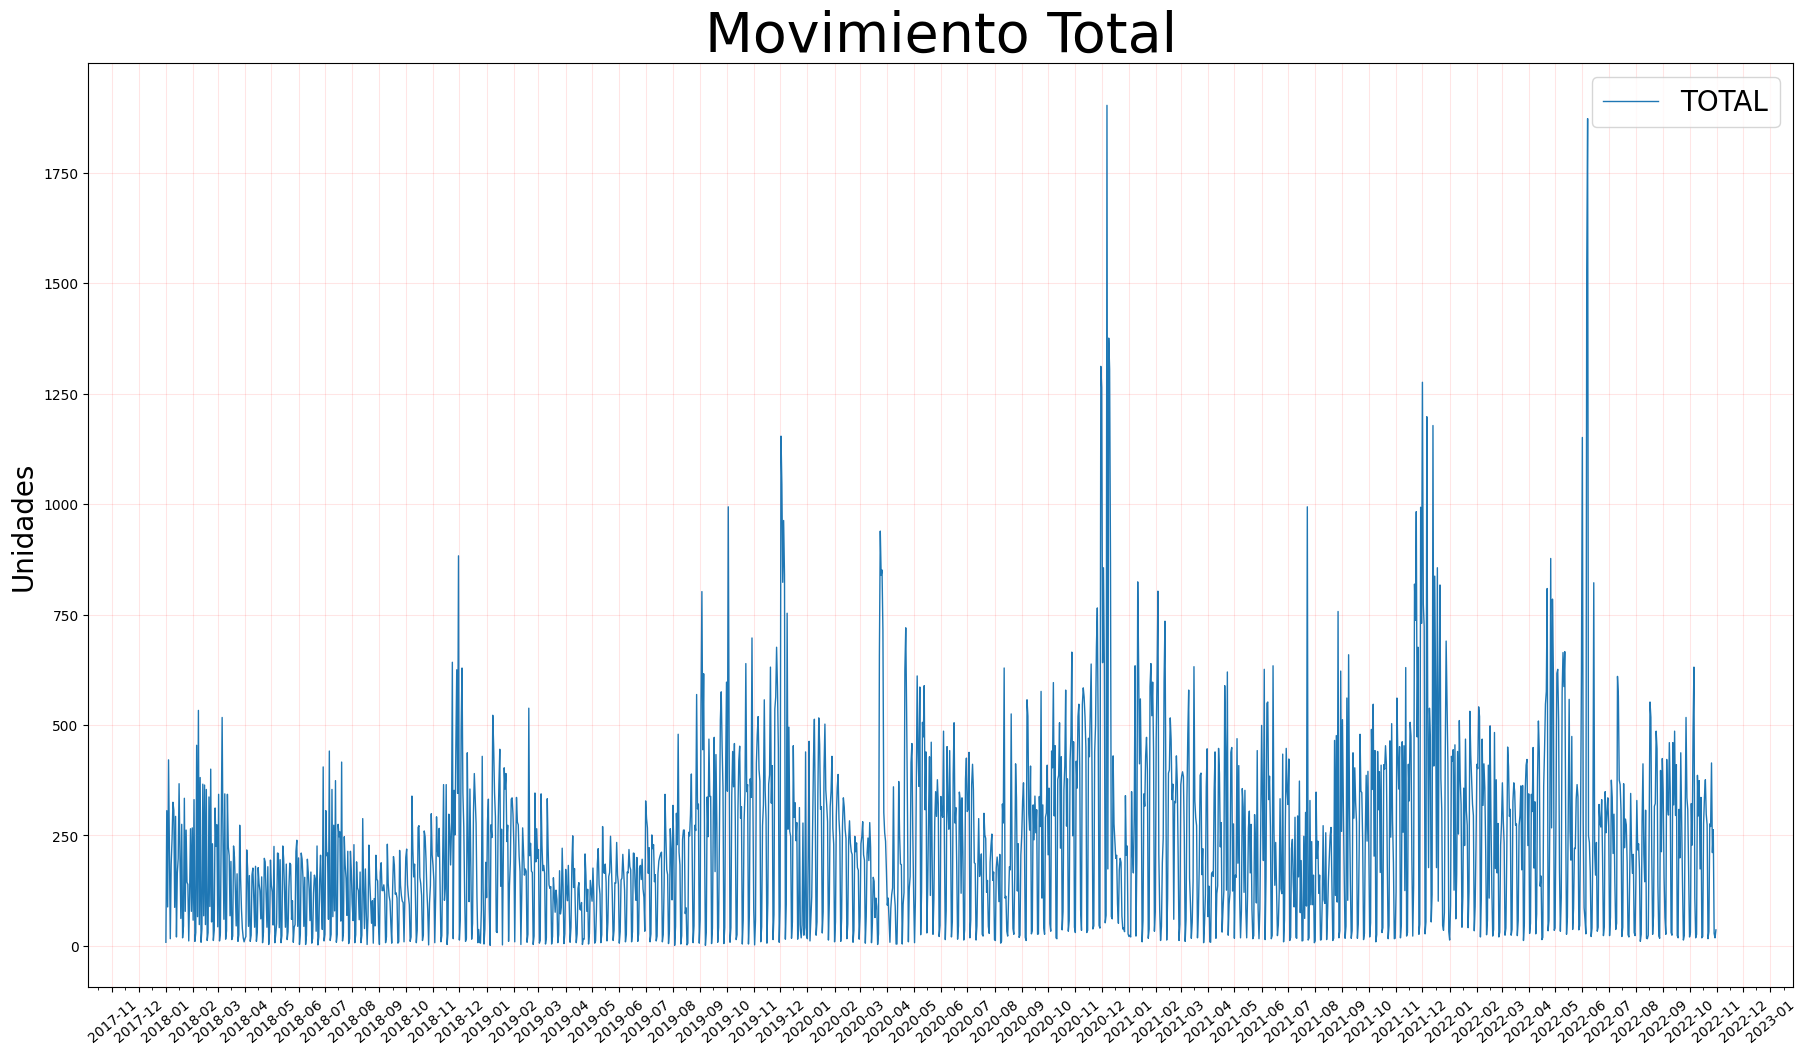

In [30]:
# importamos matplotlib previamente instalado con  !pip install matplotlib

import matplotlib.pyplot as plt
import matplotlib.dates as dates
y = date_total_ordenado['unidad']
x = date_total_ordenado['date']
fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 , label= 'TOTAL')
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_major_locator(dates.MonthLocator())
# 16 is a slight approximation since months differ in number of days.
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades', fontsize = 20)
ax.set_title('Movimiento Total', fontsize = 40)
ax.legend(fontsize = 20)
plt.grid()
plt.savefig("static\Movimiento Total.jpg")
plt.show()


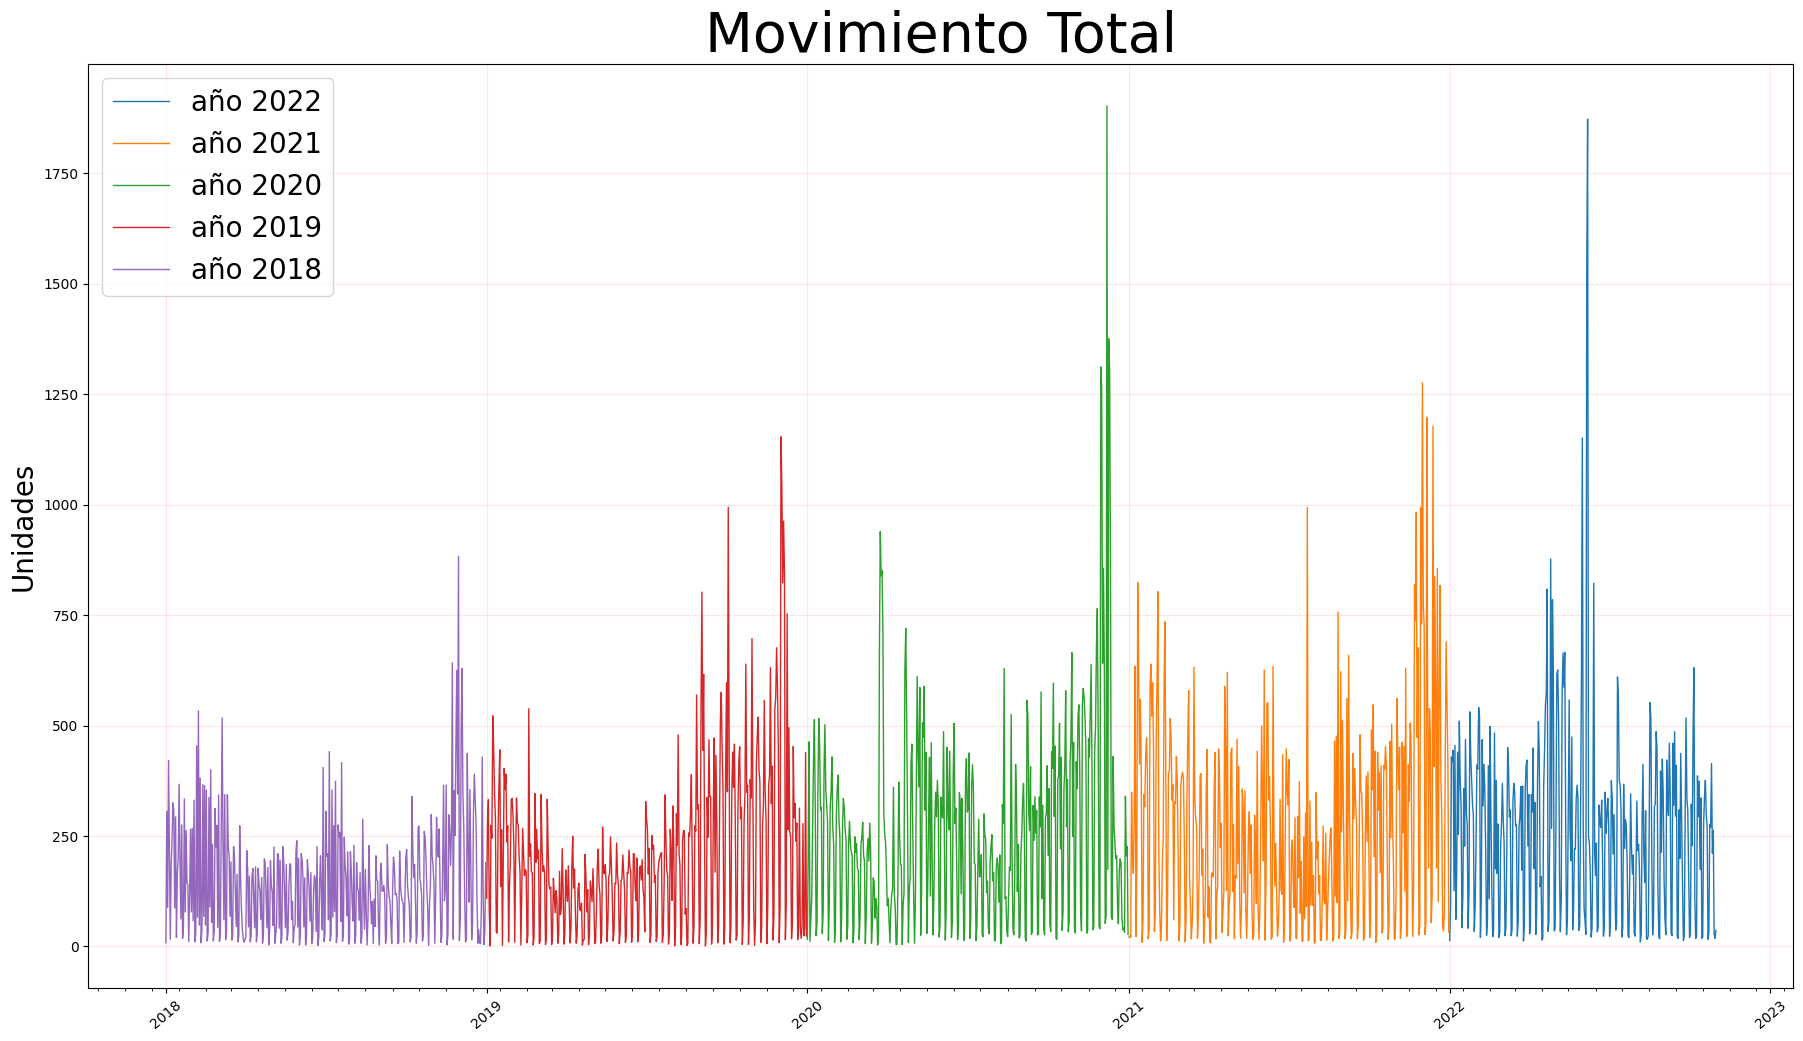

In [29]:

import matplotlib.pyplot as plt
import matplotlib.dates as dates
df = date_total_ordenado

df_2022 = df.loc[(df['date'] >= '2022-01-01') & (df['date'] < '2023-01-01')]
df_2021 = df.loc[(df['date'] >= '2021-01-01') & (df['date'] < '2022-01-01')]
df_2020 = df.loc[(df['date'] >= '2020-01-01') & (df['date'] < '2021-01-01')]
df_2019 = df.loc[(df['date'] >= '2019-01-01') & (df['date'] < '2020-01-01')]
df_2018 = df.loc[(df['date'] >= '2018-01-01') & (df['date'] < '2019-01-01')]

y = df_2022['unidad']
x = df_2022['date']
y1 = df_2021['unidad']
x1 = df_2021['date']
y2 = df_2020['unidad']
x2 = df_2020['date']
y3 = df_2019['unidad']
x3 = df_2019['date']
y4 = df_2018['unidad']
x4 = df_2018['date']

fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='año 2022')
ax.plot(x1, y1, linewidth=1.0,label='año 2021')
ax.plot(x2, y2, linewidth=1.0,label='año 2020')
ax.plot(x3, y3, linewidth=1.0,label='año 2019')
ax.plot(x4, y4, linewidth=1.0,label='año 2018')
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Movimiento Total',fontsize = 40)
plt.grid()
ax.legend(fontsize = 20)
plt.savefig("static\Años por colores.jpg")
plt.show()

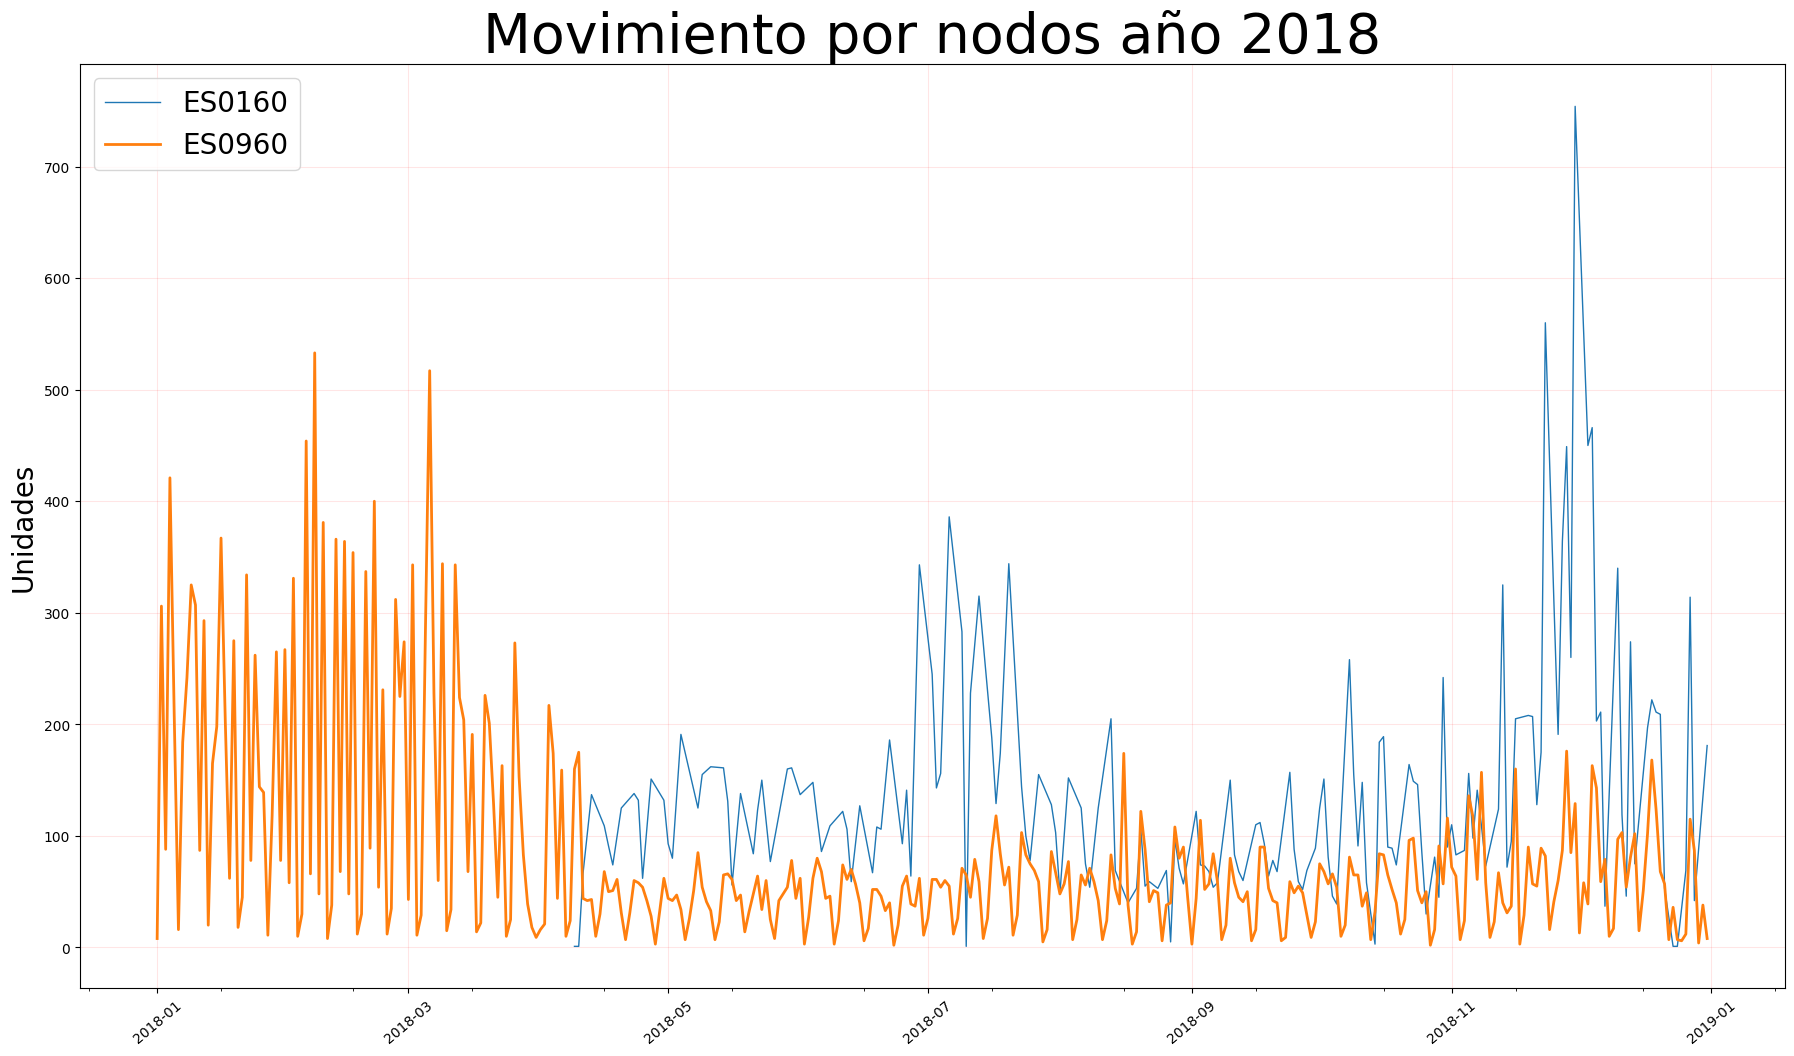

In [38]:

import matplotlib.pyplot as plt
import matplotlib.dates as dates
df1 = date_160_ordenado
df2 = date_960_ordenado
df1_año = df1.loc[(df1['date'] >= '2018-01-01') & (df1['date'] < '2019-01-01')]
df2_año = df2.loc[(df2['date'] >= '2018-01-01') & (df2['date'] < '2019-01-01')]
y = df1_año['unidad']
x = df1_año['date']
y1 = df2_año['unidad']
x1 = df2_año['date']
fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='ES0160')
ax.plot(x1, y1, linewidth=2.0,label='ES0960')
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Movimiento por nodos año 2018',fontsize = 40)
plt.grid()
ax.legend(fontsize = 20)
plt.savefig("static\Años 2018.jpg")
plt.show()

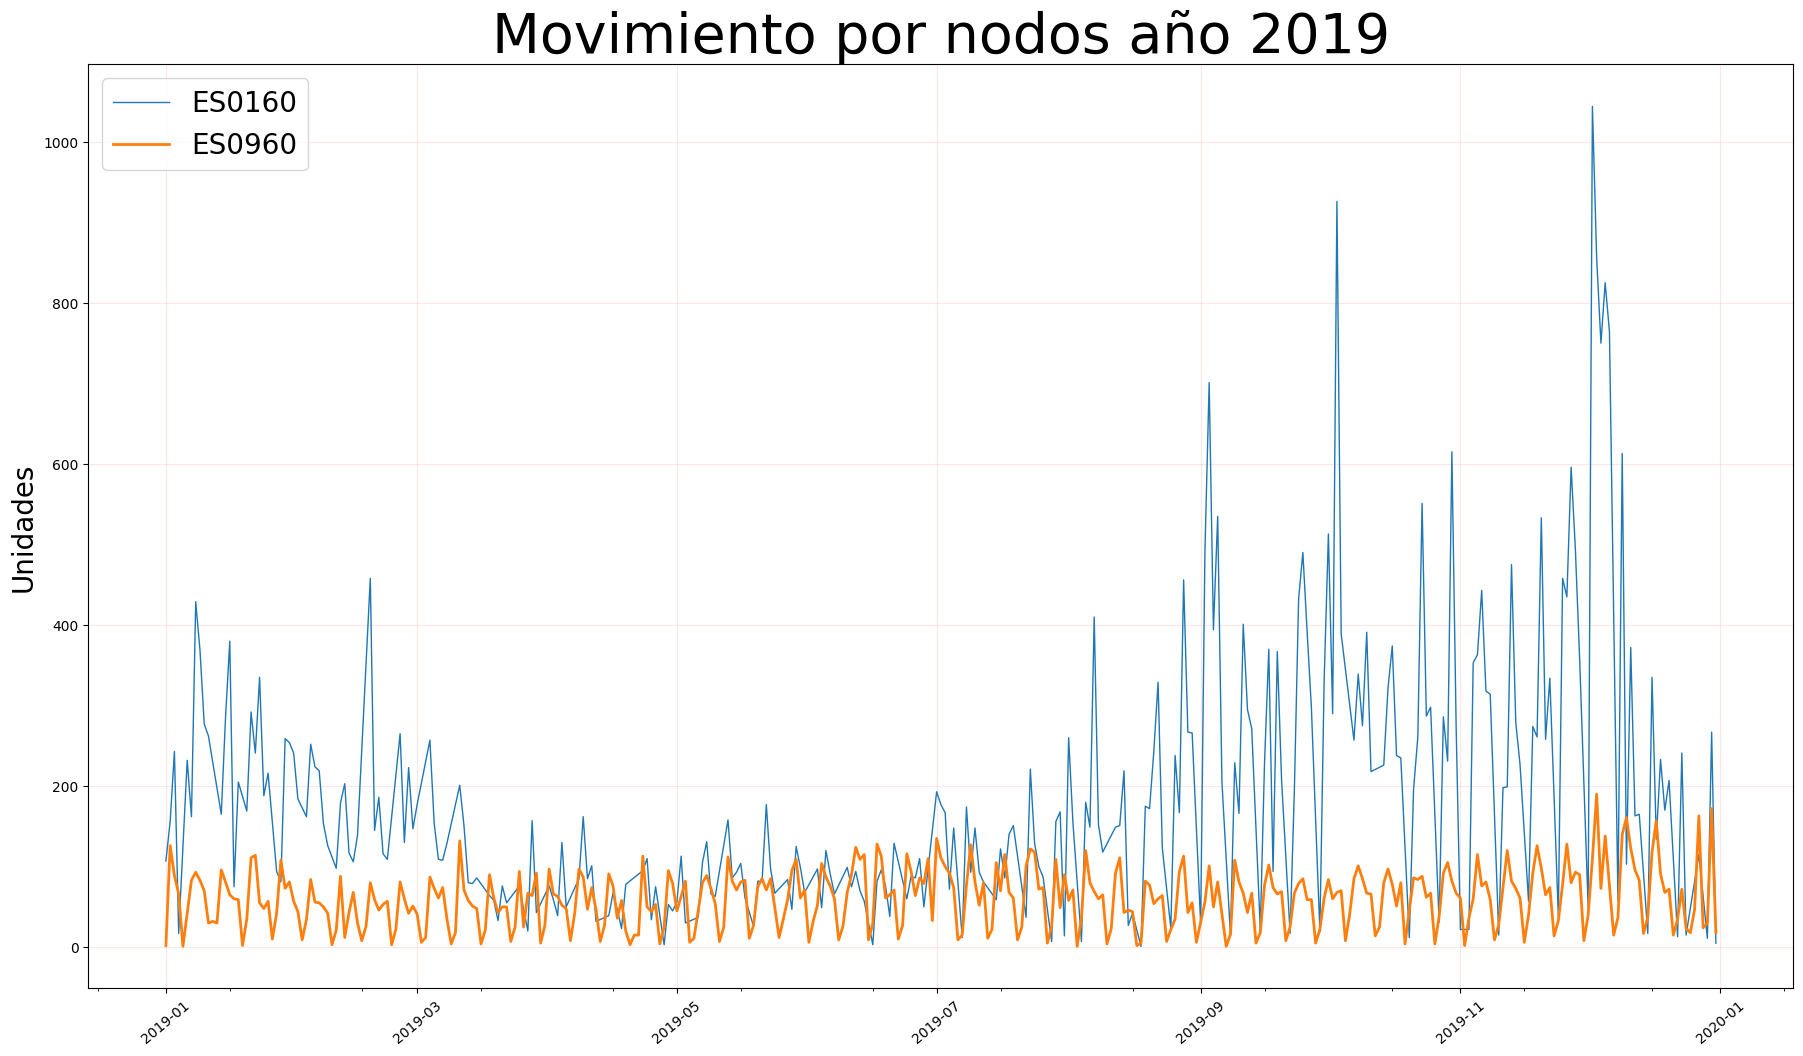

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
df1 = date_160_ordenado
df2 = date_960_ordenado
df1_año = df1.loc[(df1['date'] >= '2019-01-01') & (df1['date'] < '2020-01-01')]
df2_año = df2.loc[(df2['date'] >= '2019-01-01') & (df2['date'] < '2020-01-01')]
y = df1_año['unidad']
x = df1_año['date']
y1 = df2_año['unidad']
x1 = df2_año['date']
fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='ES0160')
ax.plot(x1, y1, linewidth=2.0,label='ES0960')
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Movimiento por nodos año 2019',fontsize = 40)
plt.grid()
ax.legend(fontsize = 20)
plt.savefig("static\Años 2019.jpg")
plt.show()

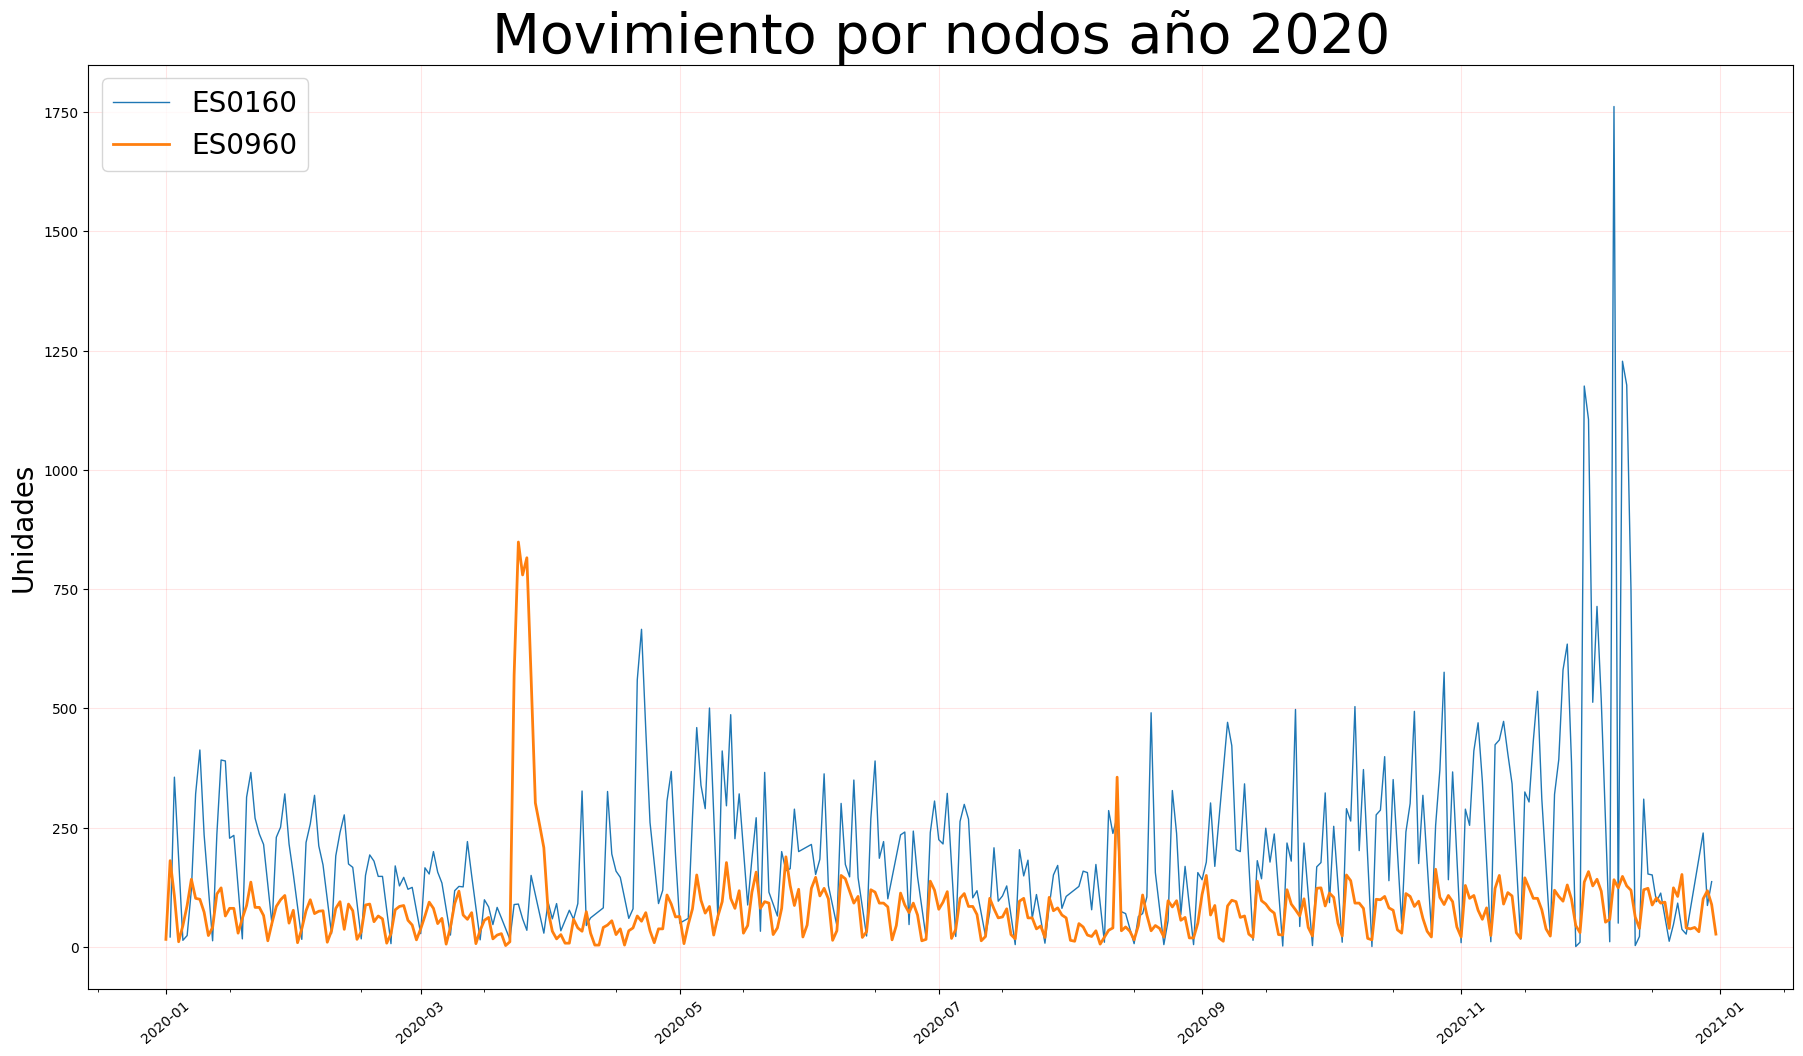

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
df1 = date_160_ordenado
df2 = date_960_ordenado
df1_año = df1.loc[(df1['date'] >= '2020-01-01') & (df1['date'] < '2021-01-01')]
df2_año = df2.loc[(df2['date'] >= '2020-01-01') & (df2['date'] < '2021-01-01')]
y = df1_año['unidad']
x = df1_año['date']
y1 = df2_año['unidad']
x1 = df2_año['date']
fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='ES0160')
ax.plot(x1, y1, linewidth=2.0,label='ES0960')
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Movimiento por nodos año 2020',fontsize = 40)
plt.grid()
ax.legend(fontsize = 20)
plt.savefig("static\Años 2020.jpg")
plt.show()

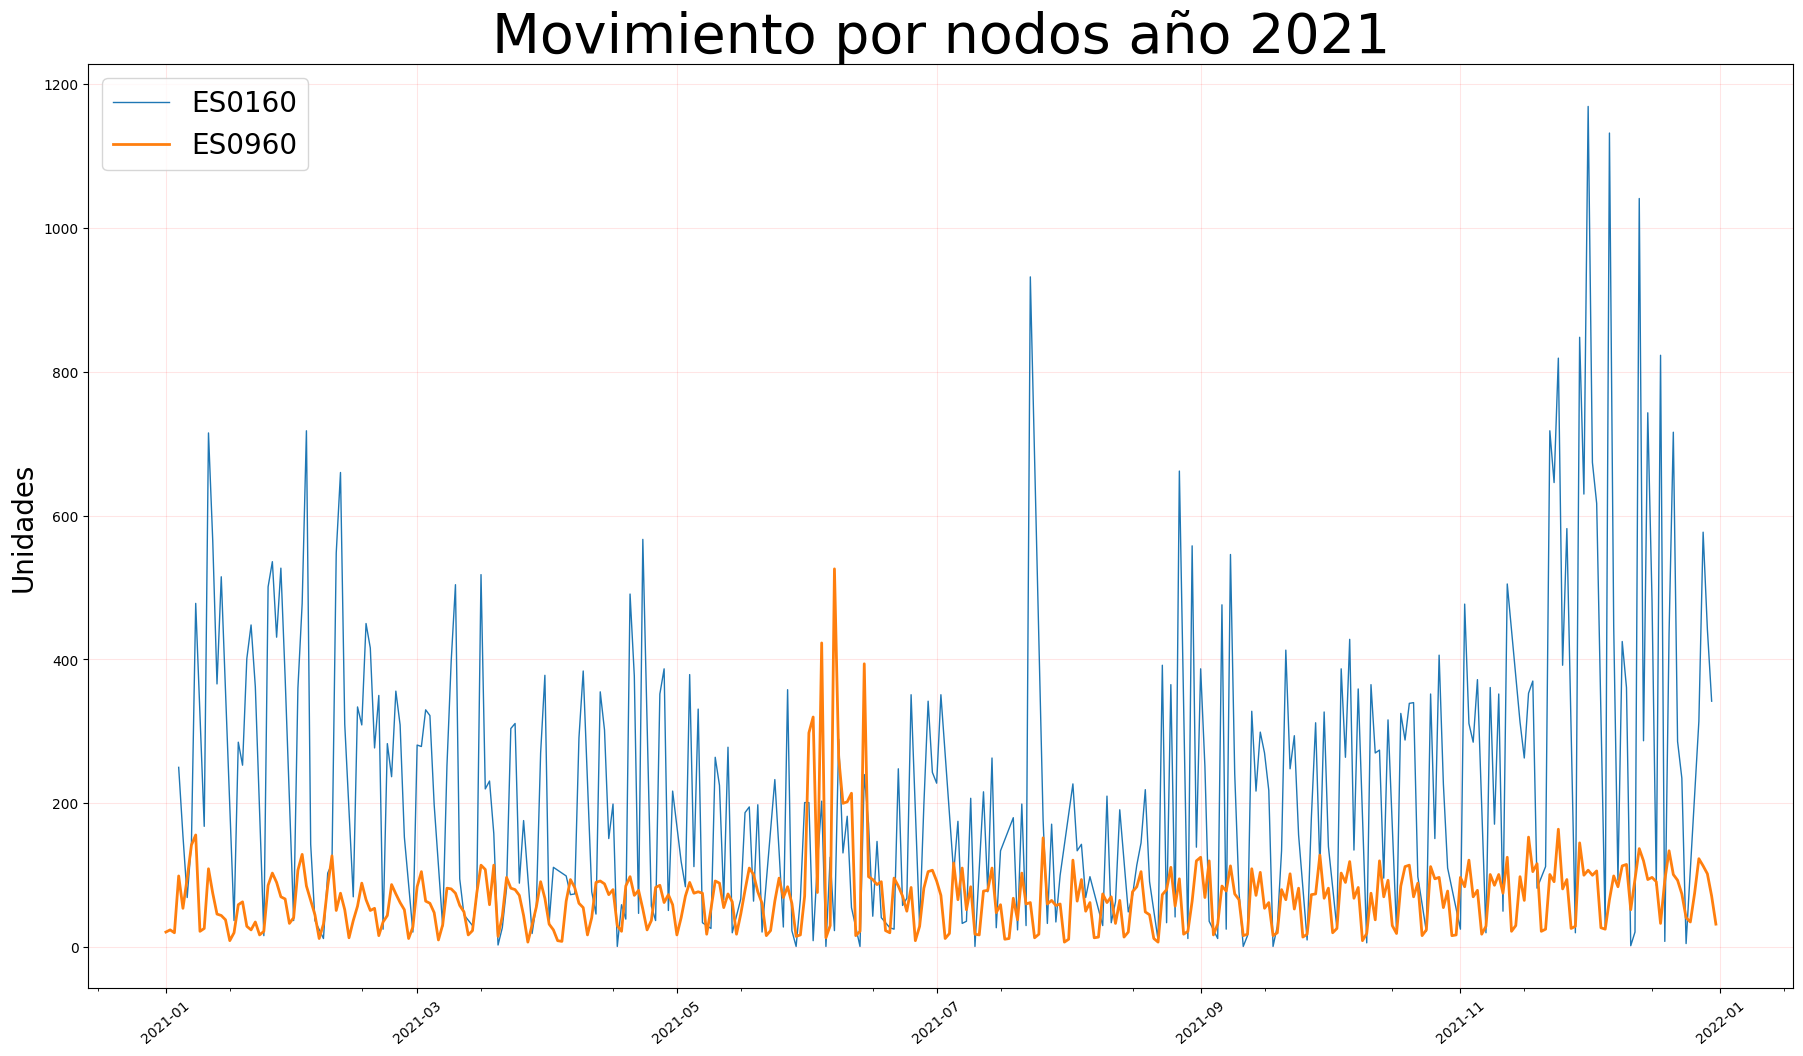

In [41]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
df1 = date_160_ordenado
df2 = date_960_ordenado
df1_año = df1.loc[(df1['date'] >= '2021-01-01') & (df1['date'] < '2022-01-01')]
df2_año = df2.loc[(df2['date'] >= '2021-01-01') & (df2['date'] < '2022-01-01')]
y = df1_año['unidad']
x = df1_año['date']
y1 = df2_año['unidad']
x1 = df2_año['date']
fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='ES0160')
ax.plot(x1, y1, linewidth=2.0,label='ES0960')
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Movimiento por nodos año 2021',fontsize = 40)
plt.grid()
ax.legend(fontsize = 20)
plt.savefig("static\Años 2021.jpg")
plt.show()

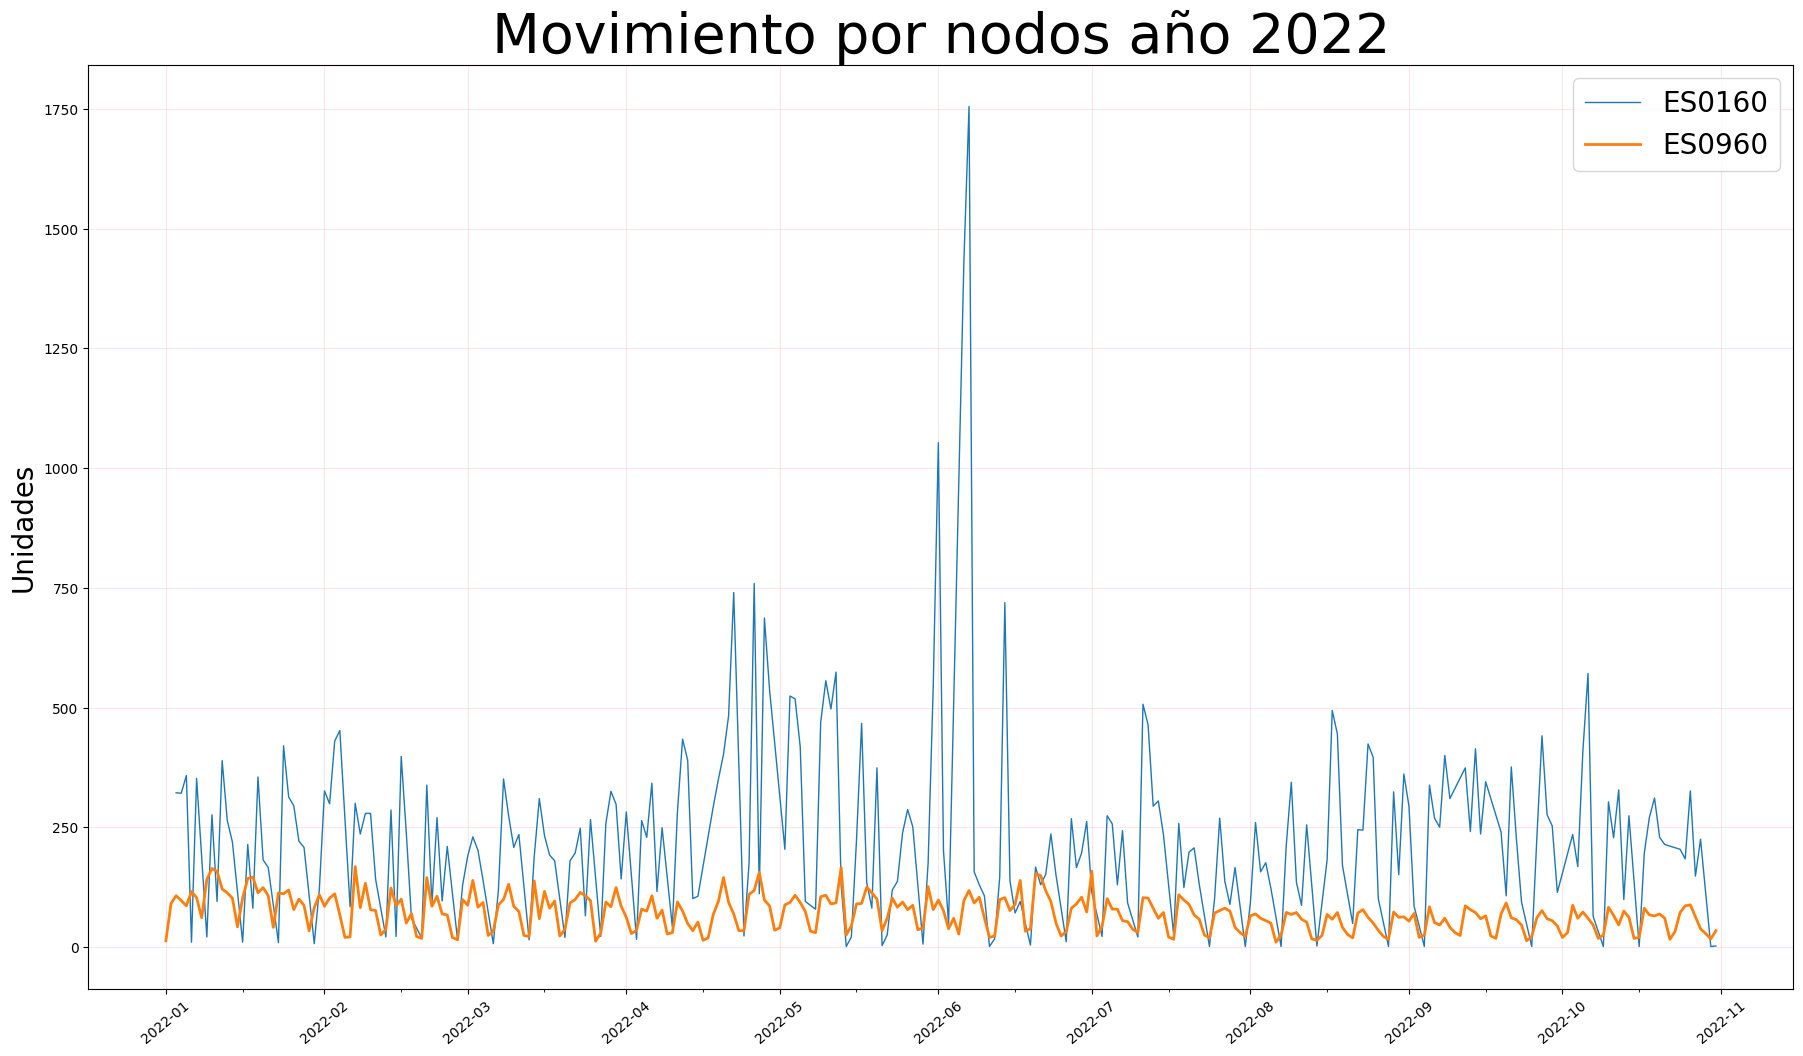

In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
df1 = date_160_ordenado
df2 = date_960_ordenado
df1_año = df1.loc[(df1['date'] >= '2022-01-01') & (df1['date'] < '2023-01-01')]
df2_año = df2.loc[(df2['date'] >= '2022-01-01') & (df2['date'] < '2023-01-01')]
y = df1_año['unidad']
x = df1_año['date']
y1 = df2_año['unidad']
x1 = df2_año['date']
fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='ES0160')
ax.plot(x1, y1, linewidth=2.0,label='ES0960')
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Movimiento por nodos año 2022',fontsize = 40)
plt.grid()
ax.legend(fontsize = 20)
plt.savefig("static\Años 2022.jpg")
plt.show()

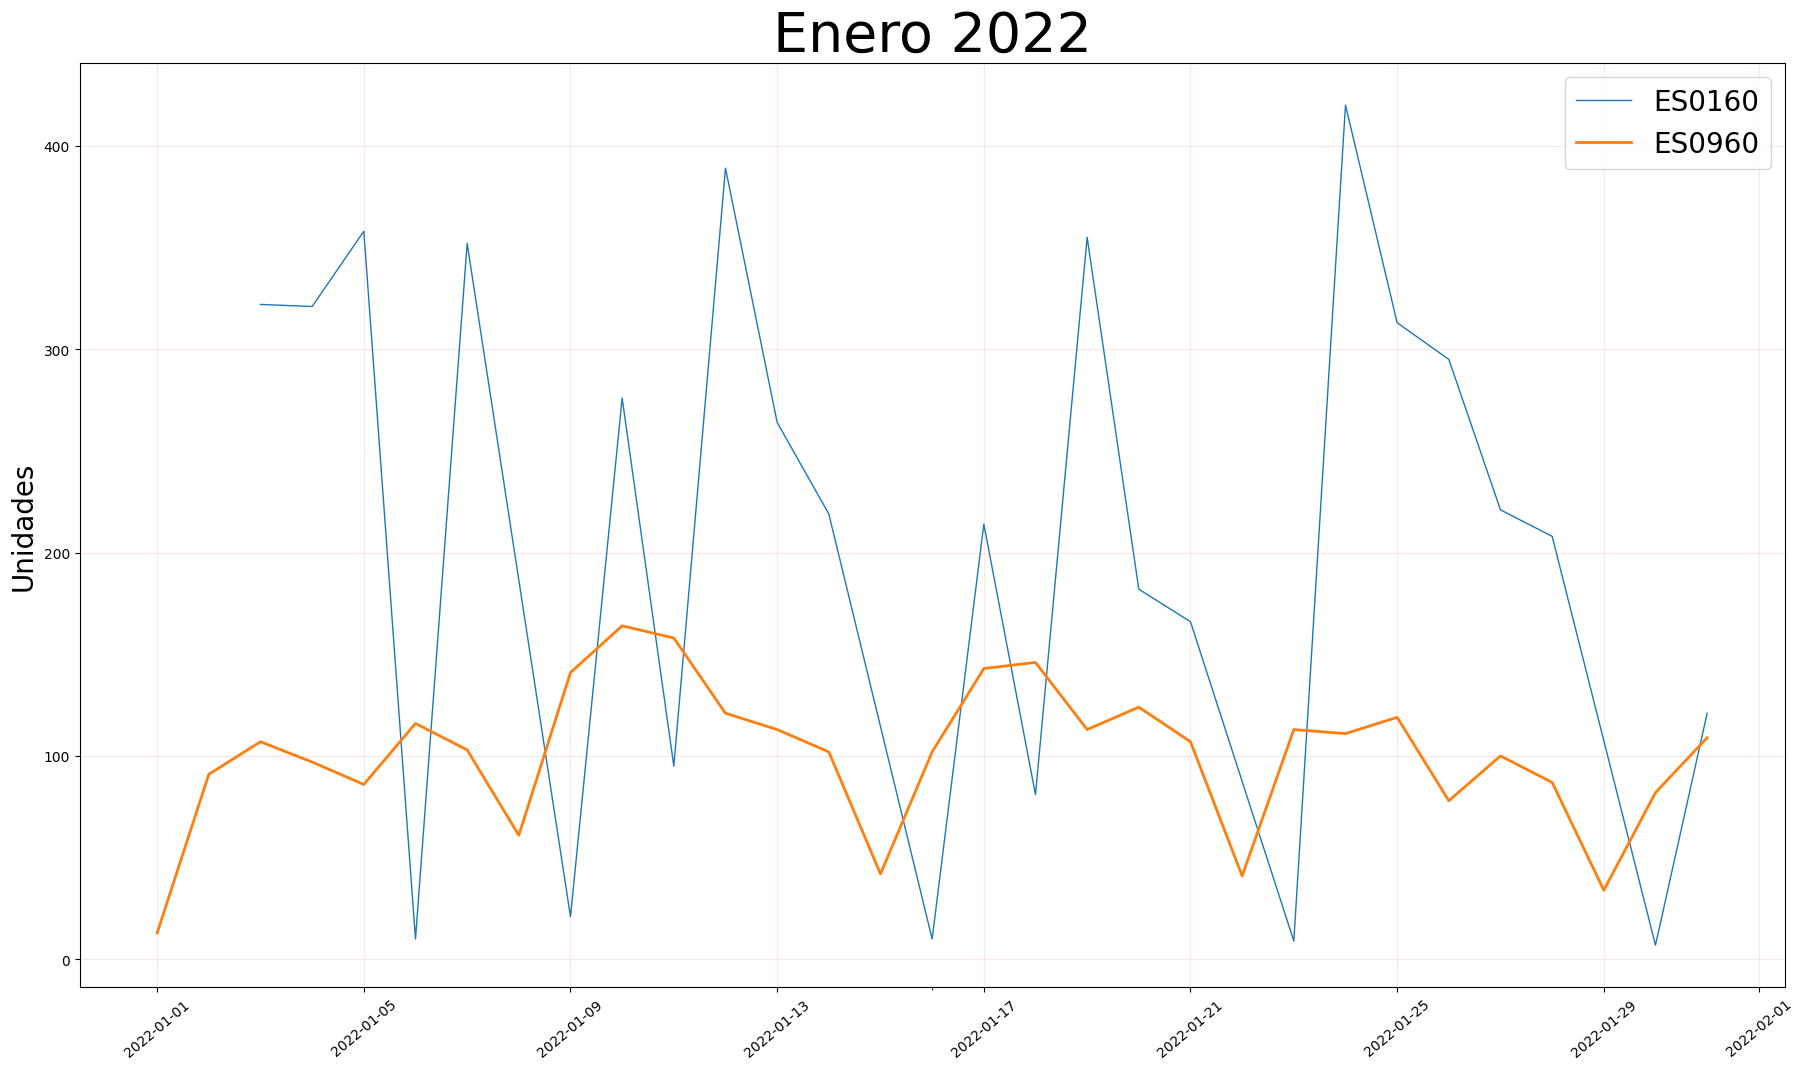

In [43]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
df1 = date_160_ordenado
df2 = date_960_ordenado
df1_año = df1.loc[(df1['date'] >= '2022-01-01') & (df1['date'] < '2022-02-01')]
df2_año = df2.loc[(df2['date'] >= '2022-01-01') & (df2['date'] < '2022-02-01')]
y = df1_año['unidad']
x = df1_año['date']
y1 = df2_año['unidad']
x1 = df2_año['date']
fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='ES0160')
ax.plot(x1, y1, linewidth=2.0,label='ES0960')
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Enero 2022',fontsize = 40)
plt.grid()
ax.legend(fontsize = 20)
plt.savefig("static\Enero 2022.jpg")
plt.show()

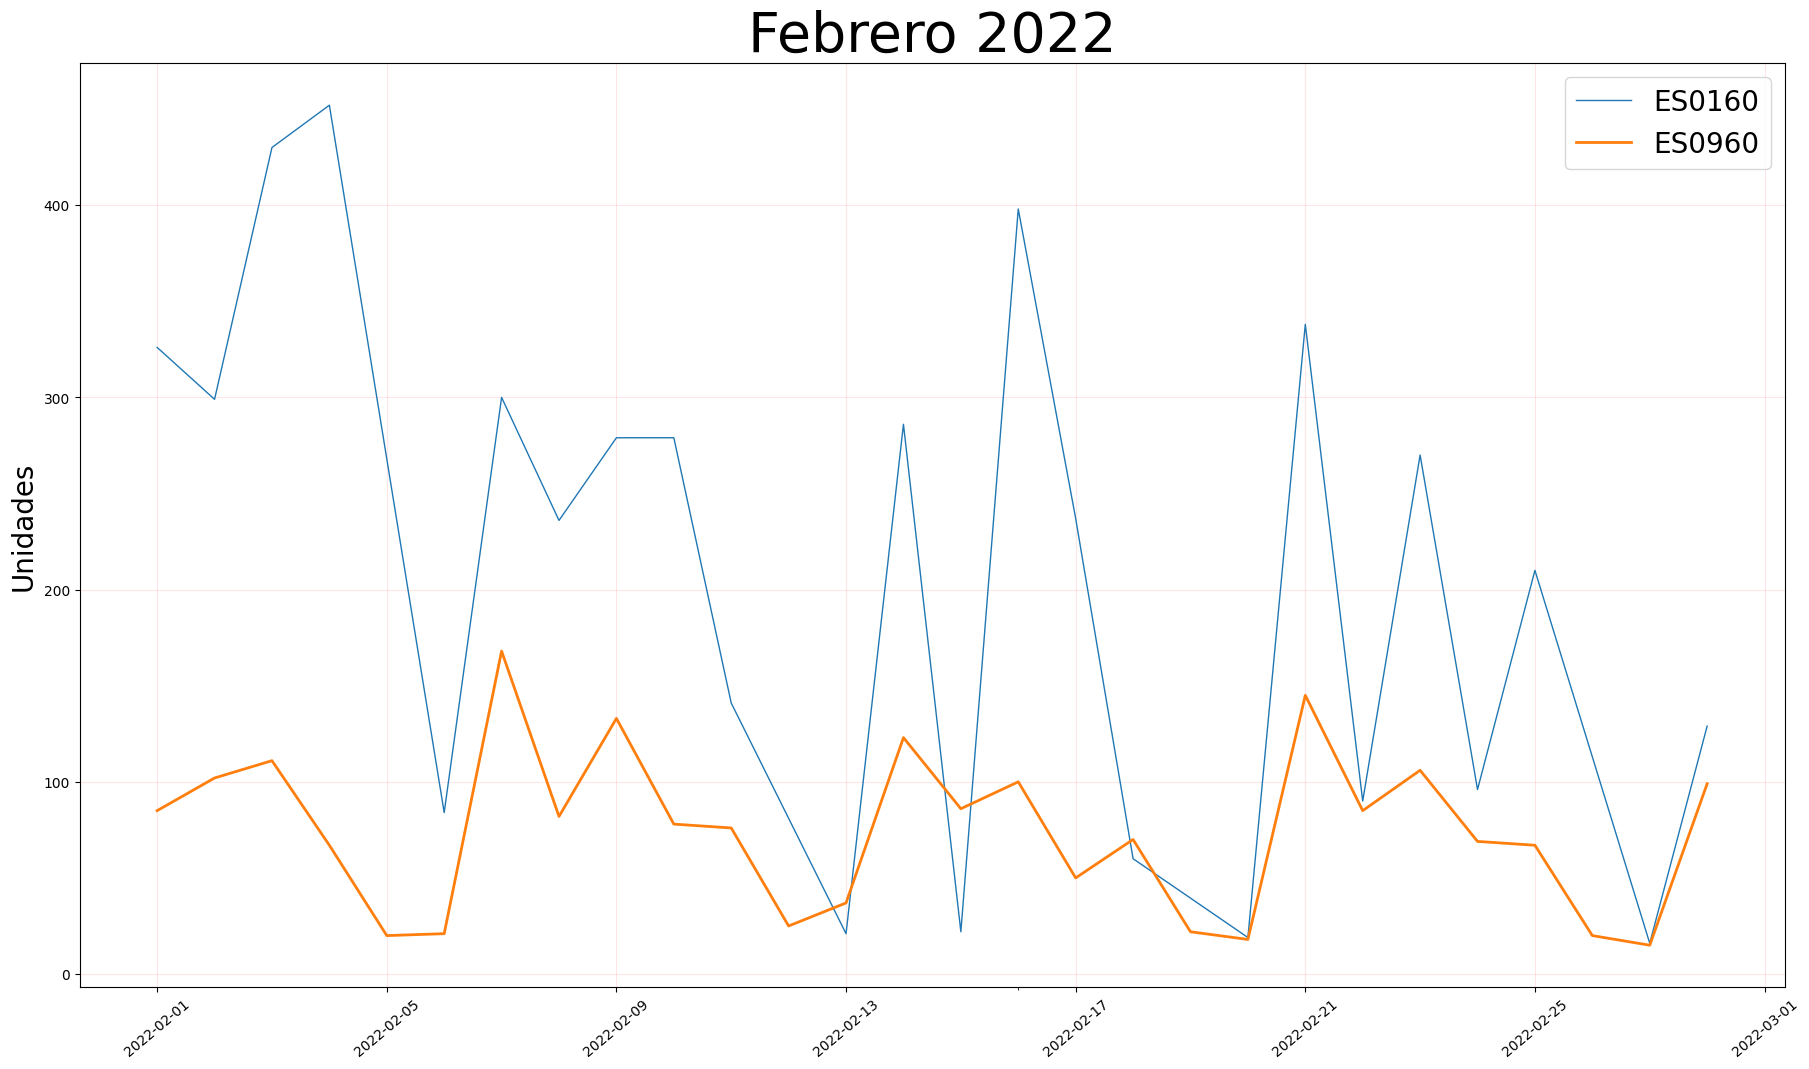

In [44]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
df1 = date_160_ordenado
df2 = date_960_ordenado
df1_año = df1.loc[(df1['date'] >= '2022-02-01') & (df1['date'] < '2022-03-01')]
df2_año = df2.loc[(df2['date'] >= '2022-02-01') & (df2['date'] < '2022-03-01')]
y = df1_año['unidad']
x = df1_año['date']
y1 = df2_año['unidad']
x1 = df2_año['date']
fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='ES0160')
ax.plot(x1, y1, linewidth=2.0,label='ES0960')
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Febrero 2022',fontsize = 40)
plt.grid()
ax.legend(fontsize = 20)
plt.savefig("static\Febrero 2022.jpg")
plt.show()

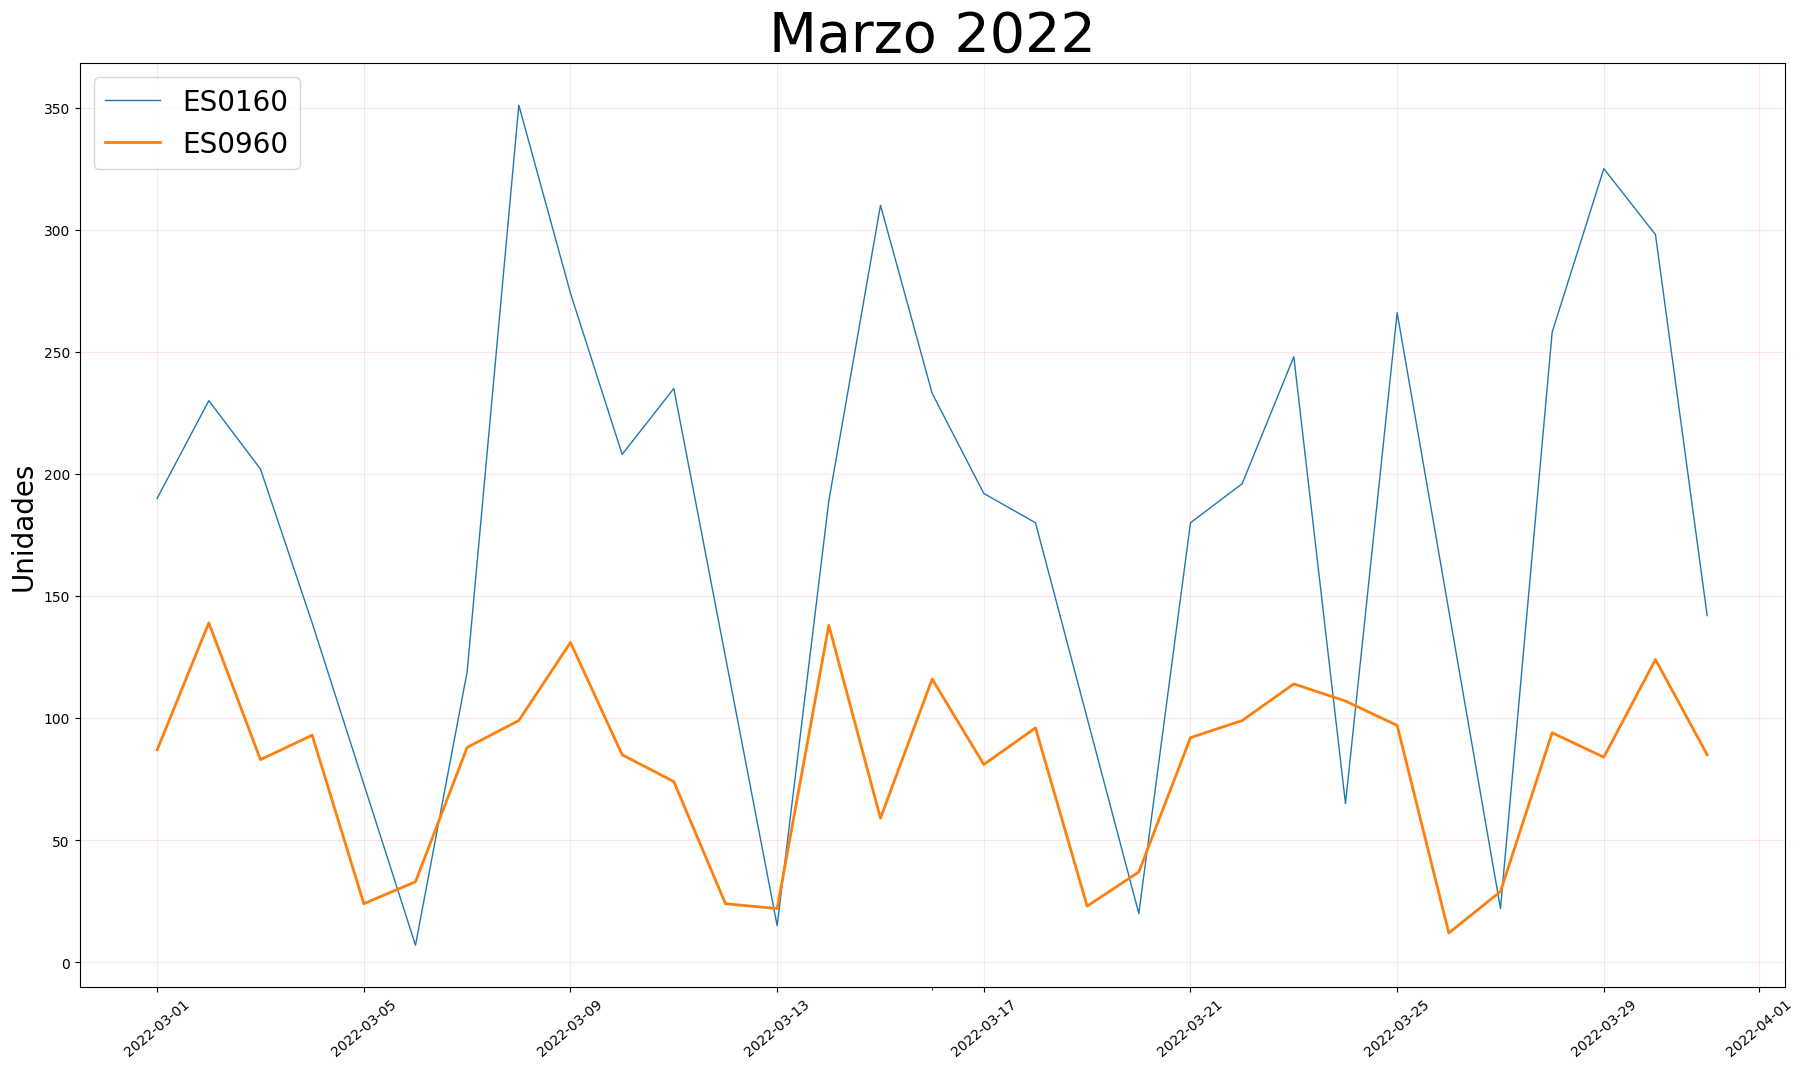

In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
df1 = date_160_ordenado
df2 = date_960_ordenado
df1_año = df1.loc[(df1['date'] >= '2022-03-01') & (df1['date'] < '2022-04-01')]
df2_año = df2.loc[(df2['date'] >= '2022-03-01') & (df2['date'] < '2022-04-01')]
y = df1_año['unidad']
x = df1_año['date']
y1 = df2_año['unidad']
x1 = df2_año['date']
fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='ES0160')
ax.plot(x1, y1, linewidth=2.0,label='ES0960')
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Marzo 2022',fontsize = 40)
plt.grid()
ax.legend(fontsize = 20)
plt.savefig("static\Marzo 2022.jpg")
plt.show()

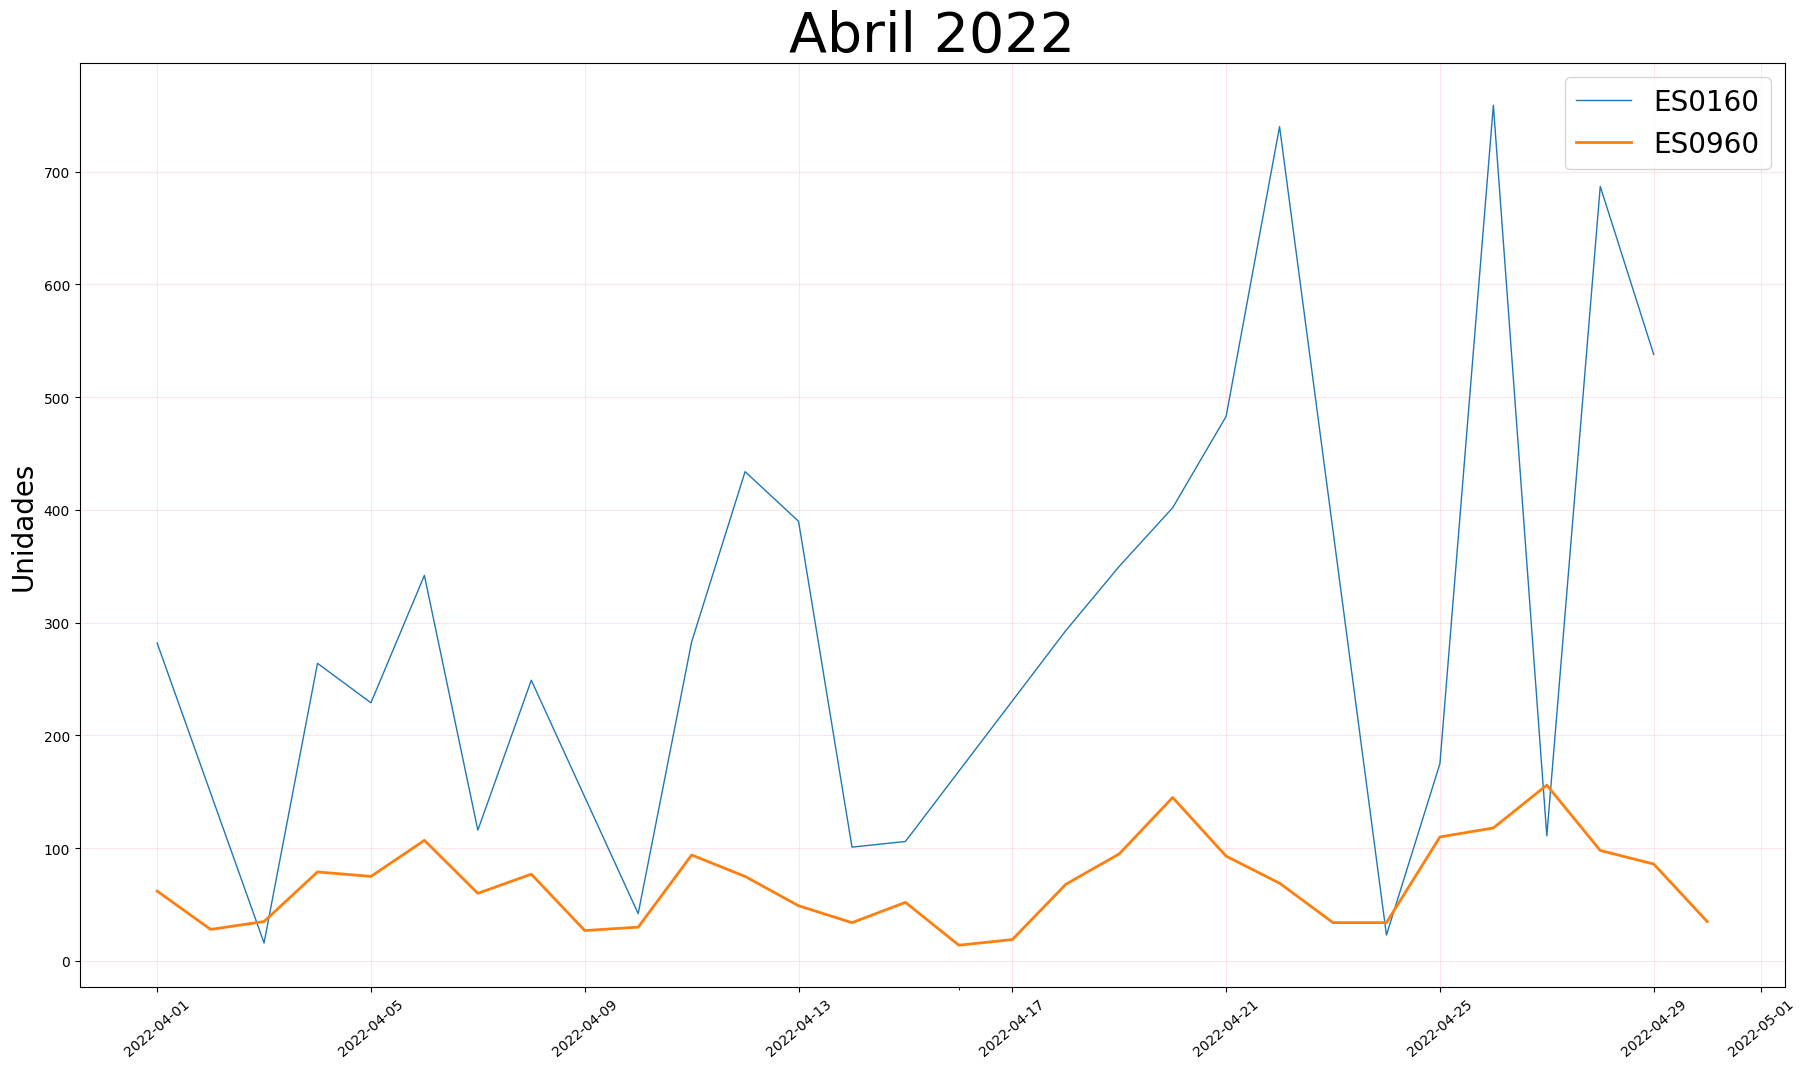

In [47]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
df1 = date_160_ordenado
df2 = date_960_ordenado
df1_año = df1.loc[(df1['date'] >= '2022-04-01') & (df1['date'] < '2022-05-01')]
df2_año = df2.loc[(df2['date'] >= '2022-04-01') & (df2['date'] < '2022-05-01')]
y = df1_año['unidad']
x = df1_año['date']
y1 = df2_año['unidad']
x1 = df2_año['date']
fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='ES0160')
ax.plot(x1, y1, linewidth=2.0,label='ES0960')
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Abril 2022',fontsize = 40)
plt.grid()
ax.legend(fontsize = 20)
plt.savefig("static\Abril 2022.jpg")
plt.show()

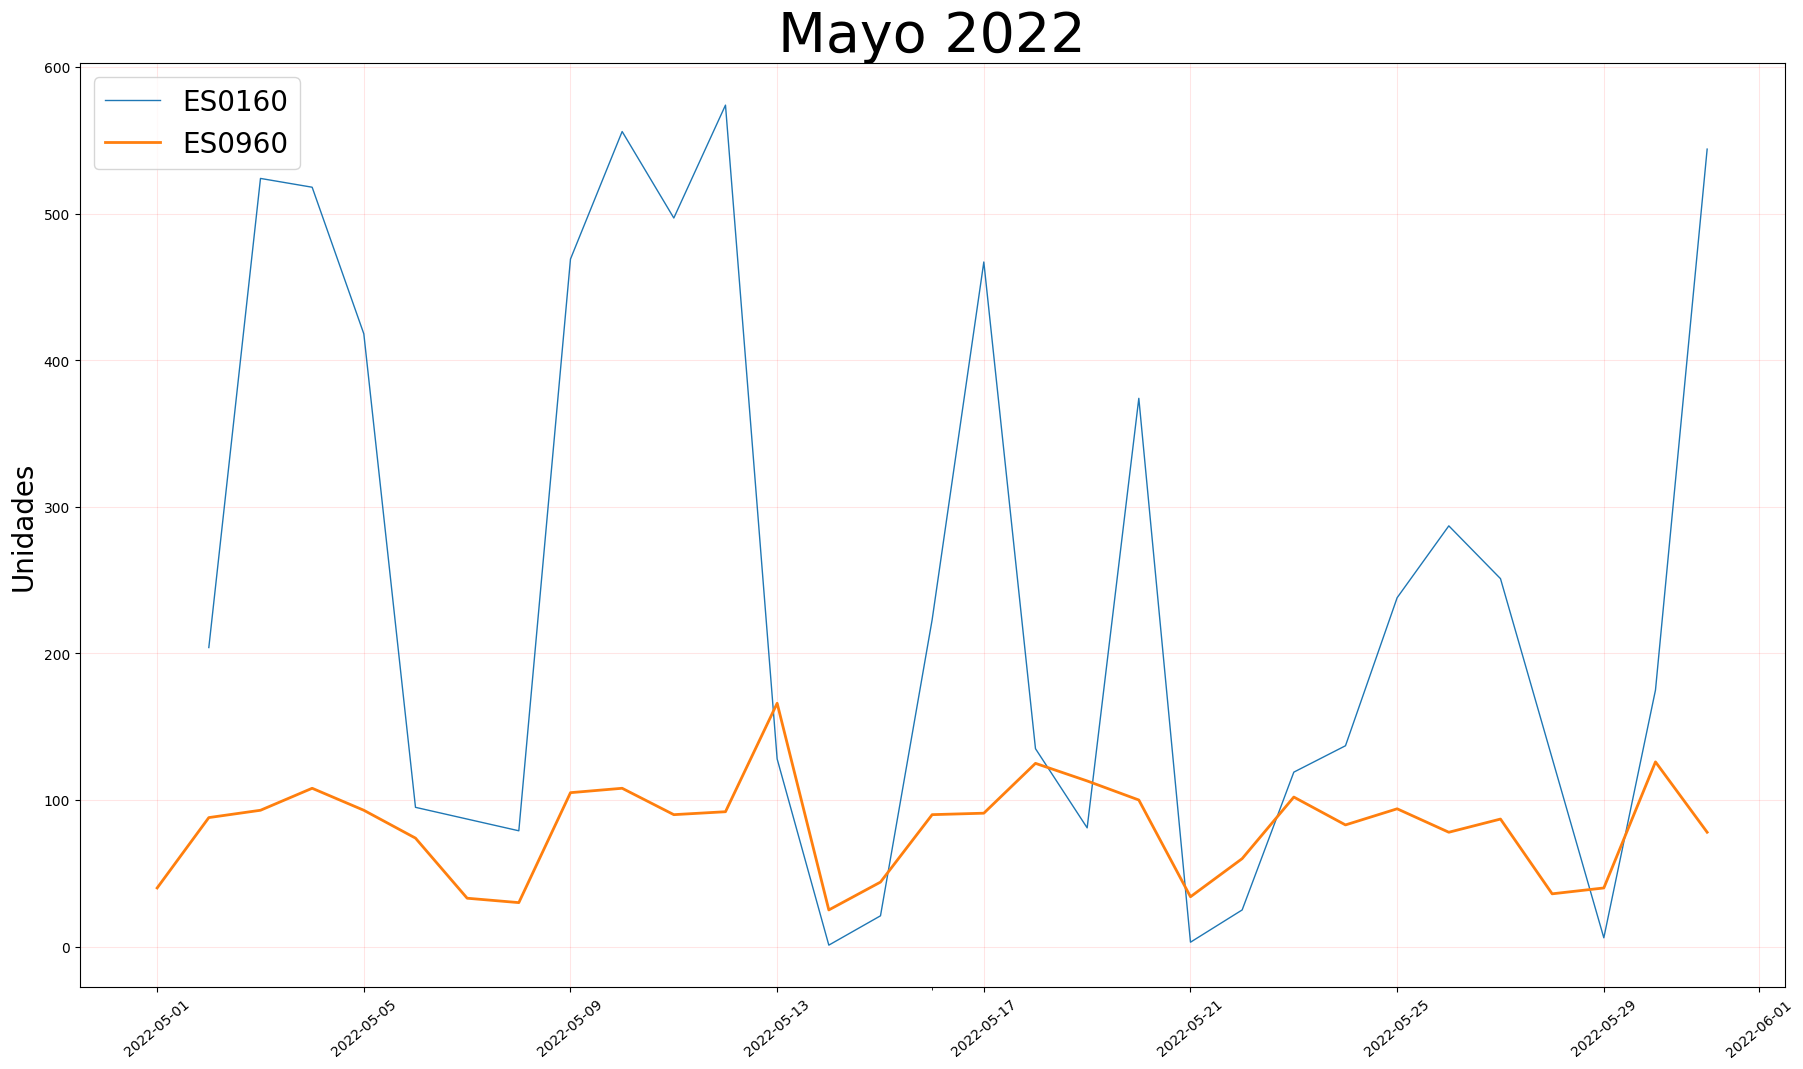

In [50]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
df1 = date_160_ordenado
df2 = date_960_ordenado
df1_año = df1.loc[(df1['date'] >= '2022-05-01') & (df1['date'] < '2022-06-01')]
df2_año = df2.loc[(df2['date'] >= '2022-05-01') & (df2['date'] < '2022-06-01')]
y = df1_año['unidad']
x = df1_año['date']
y1 = df2_año['unidad']
x1 = df2_año['date']
fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='ES0160')
ax.plot(x1, y1, linewidth=2.0,label='ES0960')
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Mayo 2022',fontsize = 40)
plt.grid()
ax.legend(fontsize = 20)
plt.savefig("static\Mayo 2022.jpg")
plt.show()

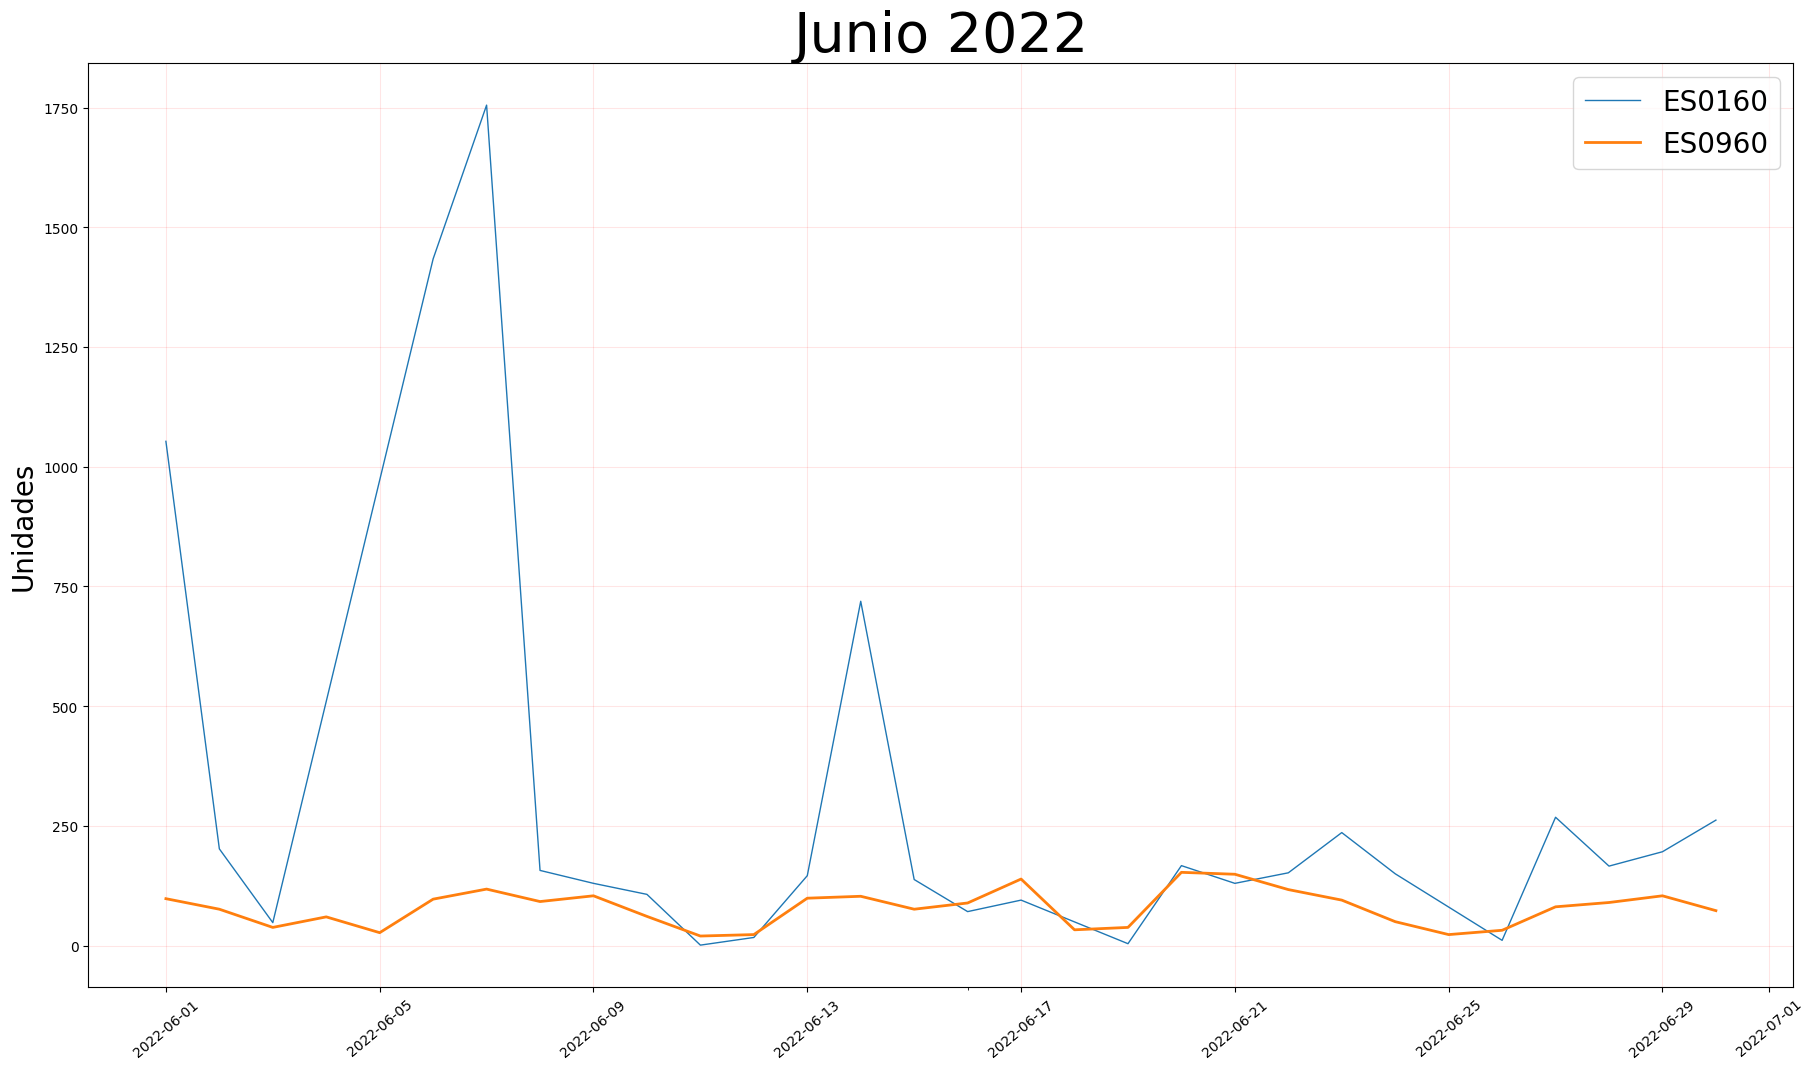

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
df1 = date_160_ordenado
df2 = date_960_ordenado
df1_año = df1.loc[(df1['date'] >= '2022-06-01') & (df1['date'] < '2022-07-01')]
df2_año = df2.loc[(df2['date'] >= '2022-06-01') & (df2['date'] < '2022-07-01')]
y = df1_año['unidad']
x = df1_año['date']
y1 = df2_año['unidad']
x1 = df2_año['date']
fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='ES0160')
ax.plot(x1, y1, linewidth=2.0,label='ES0960')
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Junio 2022',fontsize = 40)
plt.grid()
ax.legend(fontsize = 20)
plt.savefig("static\Junio 2022.jpg")
plt.show()

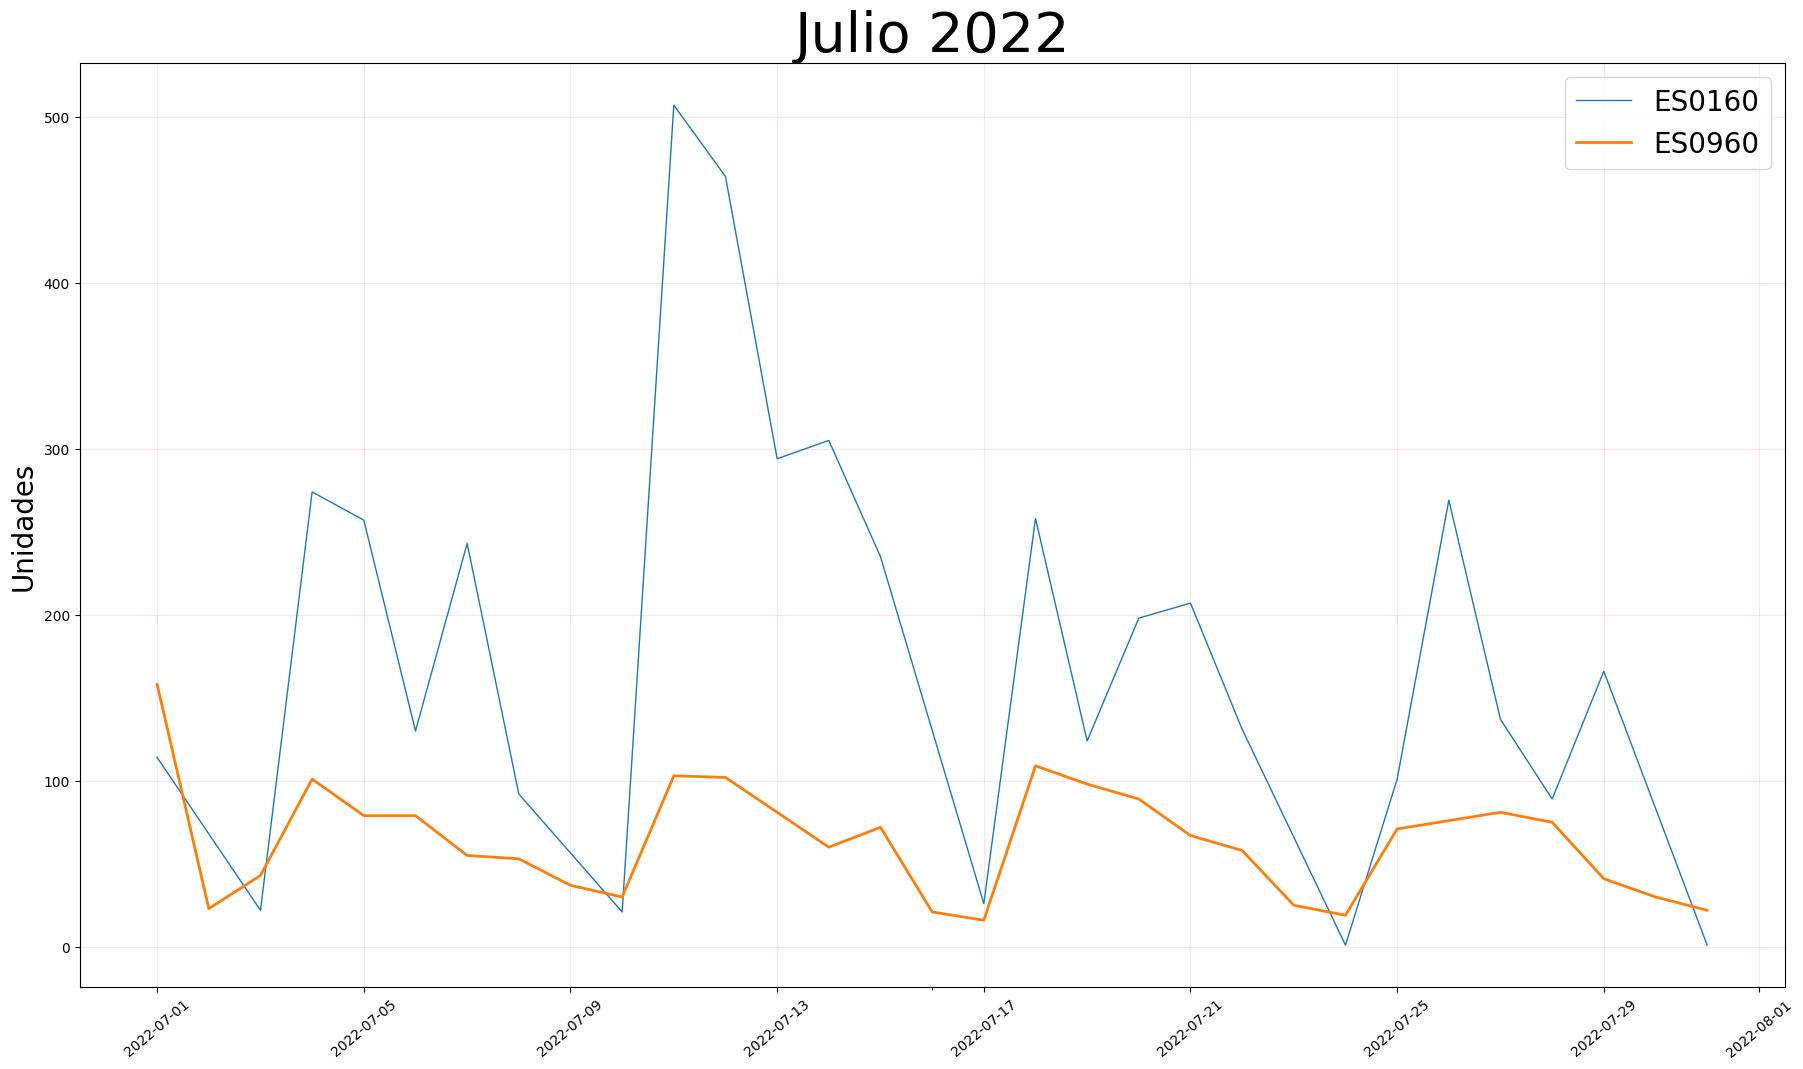

In [52]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
df1 = date_160_ordenado
df2 = date_960_ordenado
df1_año = df1.loc[(df1['date'] >= '2022-07-01') & (df1['date'] < '2022-08-01')]
df2_año = df2.loc[(df2['date'] >= '2022-07-01') & (df2['date'] < '2022-08-01')]
y = df1_año['unidad']
x = df1_año['date']
y1 = df2_año['unidad']
x1 = df2_año['date']
fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='ES0160')
ax.plot(x1, y1, linewidth=2.0,label='ES0960')
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Julio 2022',fontsize = 40)
plt.grid()
ax.legend(fontsize = 20)
plt.savefig("static\Julio 2022.jpg")
plt.show()

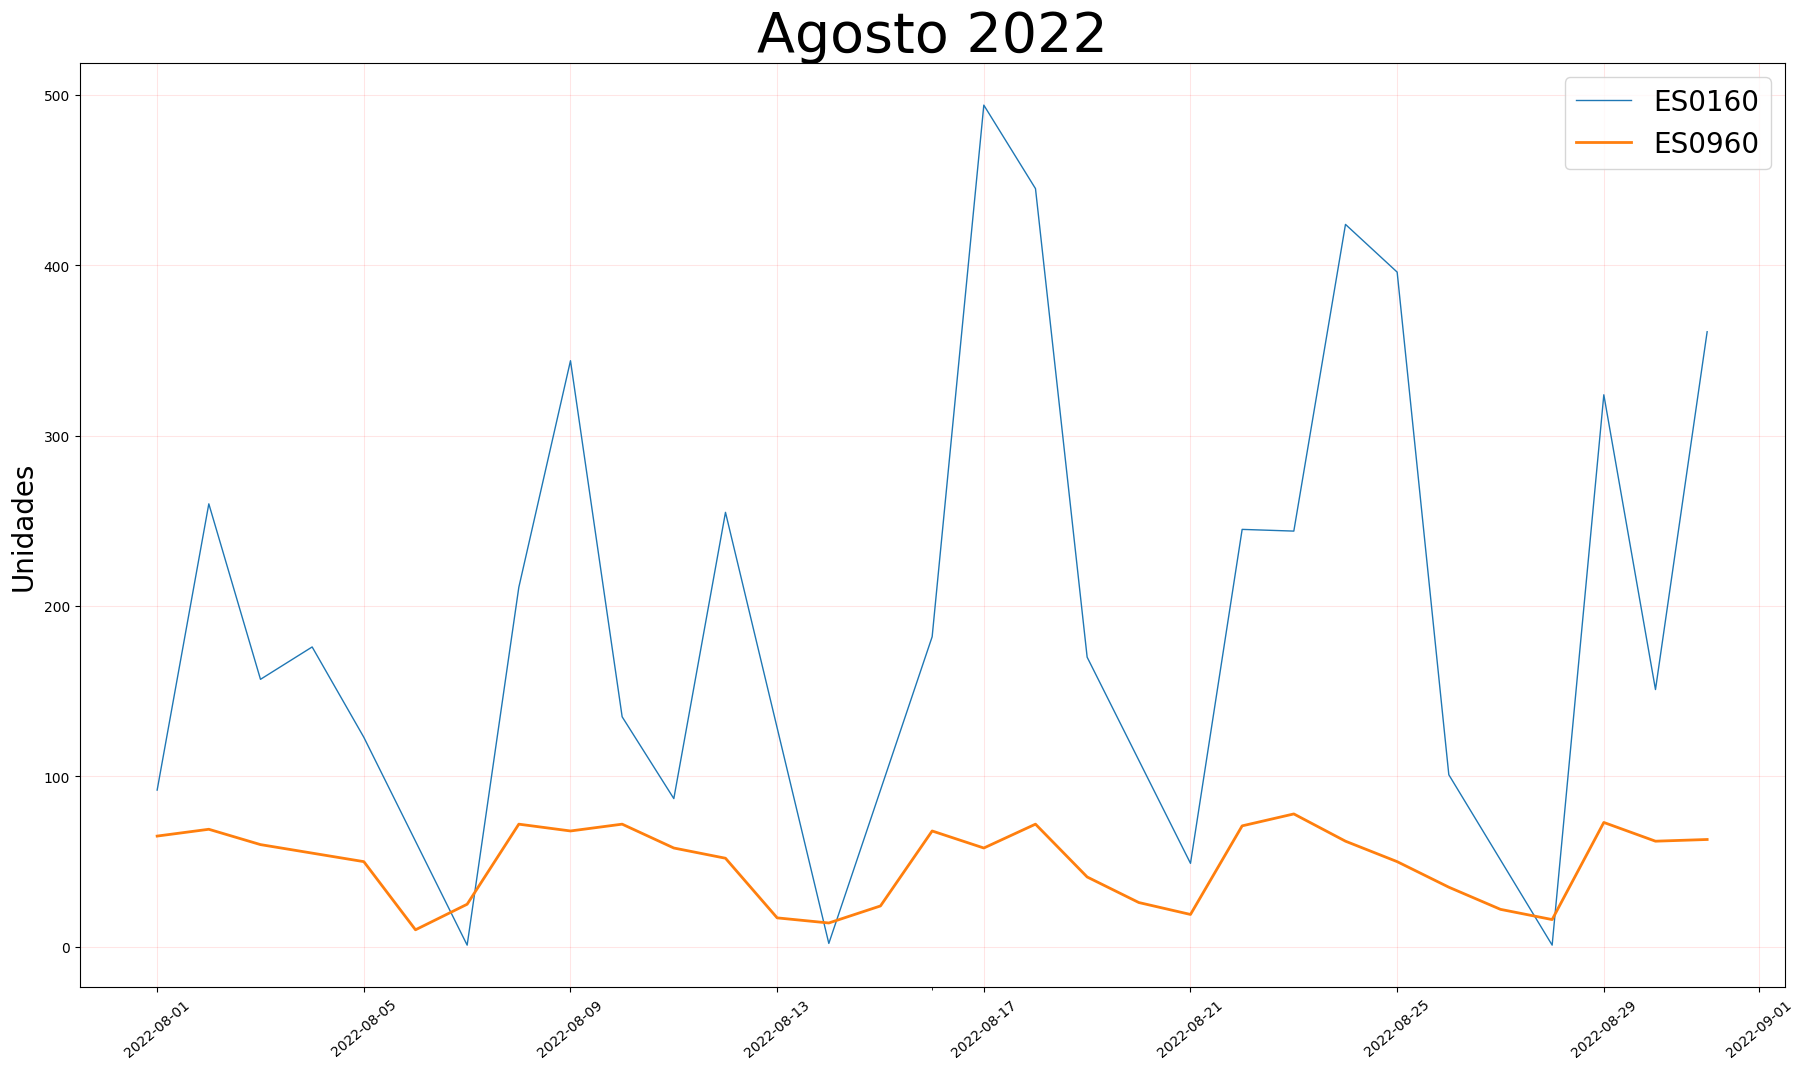

In [53]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
df1 = date_160_ordenado
df2 = date_960_ordenado
df1_año = df1.loc[(df1['date'] >= '2022-08-01') & (df1['date'] < '2022-09-01')]
df2_año = df2.loc[(df2['date'] >= '2022-08-01') & (df2['date'] < '2022-09-01')]
y = df1_año['unidad']
x = df1_año['date']
y1 = df2_año['unidad']
x1 = df2_año['date']
fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='ES0160')
ax.plot(x1, y1, linewidth=2.0,label='ES0960')
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Agosto 2022',fontsize = 40)
plt.grid()
ax.legend(fontsize = 20)
plt.savefig("static\Agosto 2022.jpg")
plt.show()

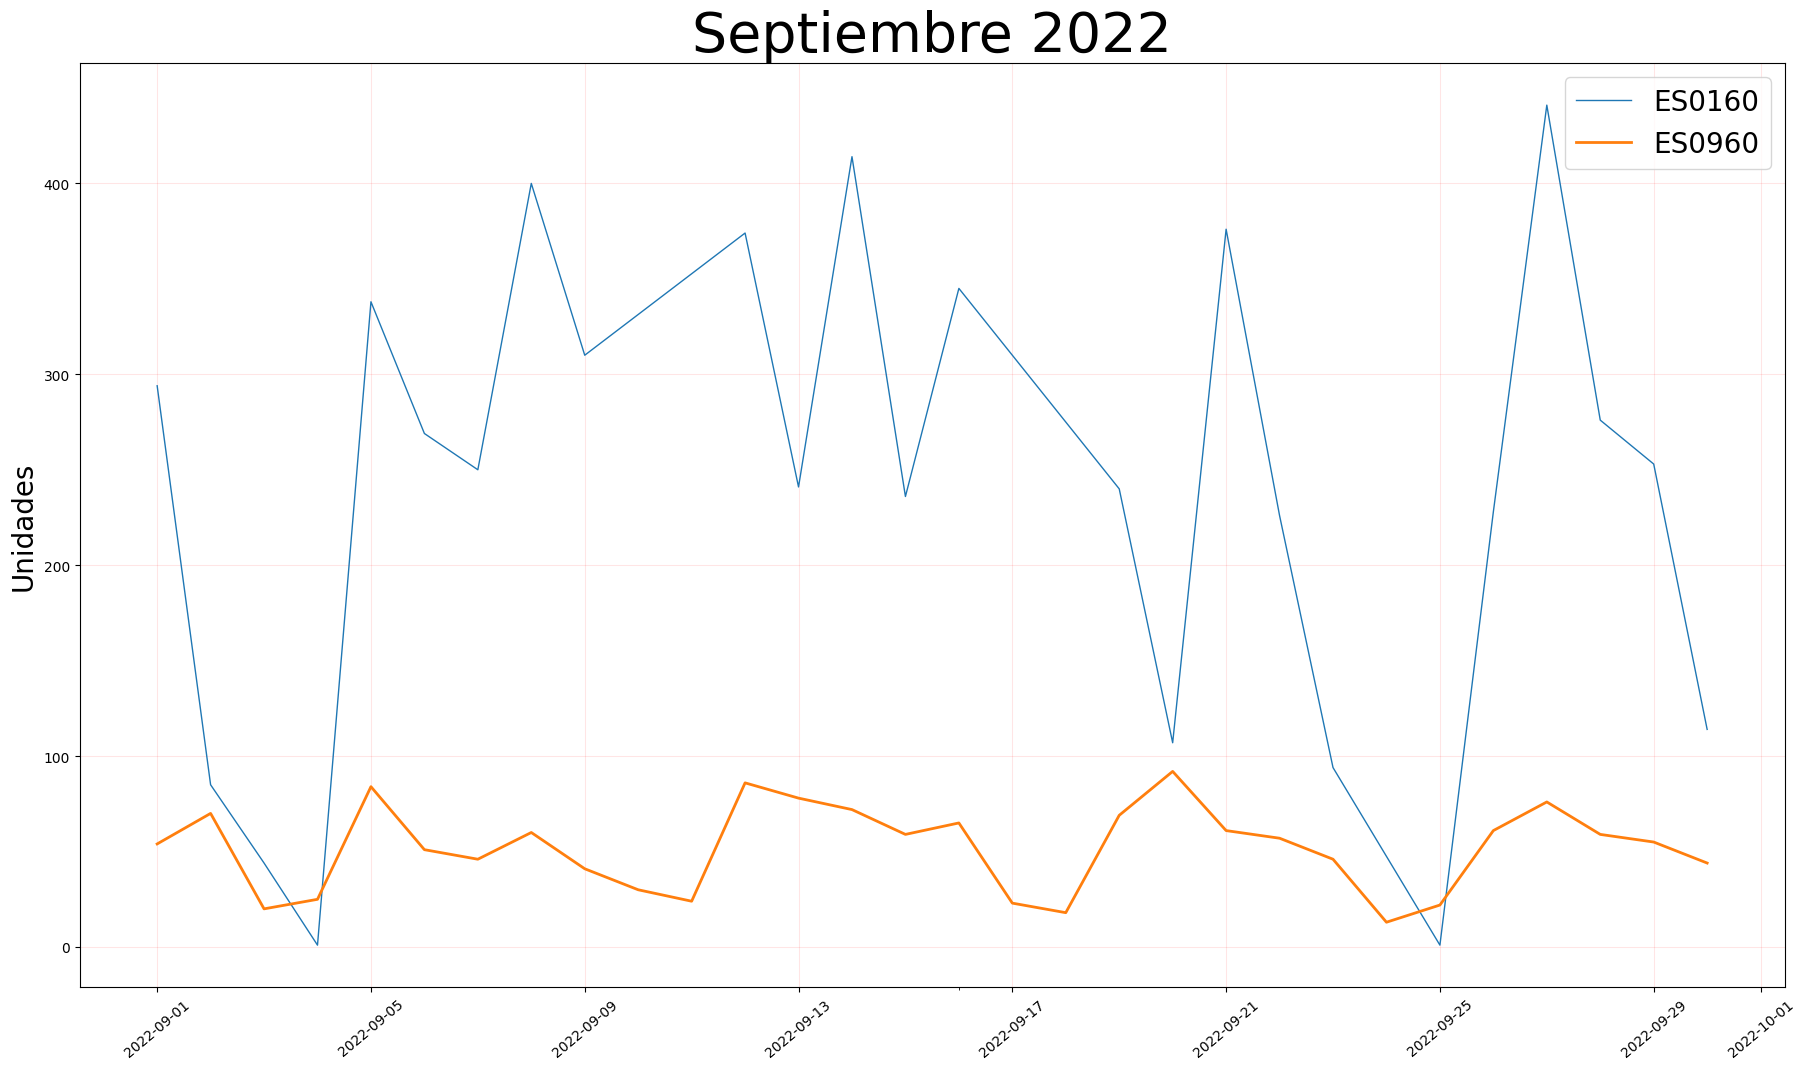

In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
df1 = date_160_ordenado
df2 = date_960_ordenado
df1_año = df1.loc[(df1['date'] >= '2022-09-01') & (df1['date'] < '2022-10-01')]
df2_año = df2.loc[(df2['date'] >= '2022-09-01') & (df2['date'] < '2022-10-01')]
y = df1_año['unidad']
x = df1_año['date']
y1 = df2_año['unidad']
x1 = df2_año['date']
fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='ES0160')
ax.plot(x1, y1, linewidth=2.0,label='ES0960')
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Septiembre 2022',fontsize = 40)
plt.grid()
ax.legend(fontsize = 20)
plt.savefig("static\Septiembre 2022.jpg")
plt.show()

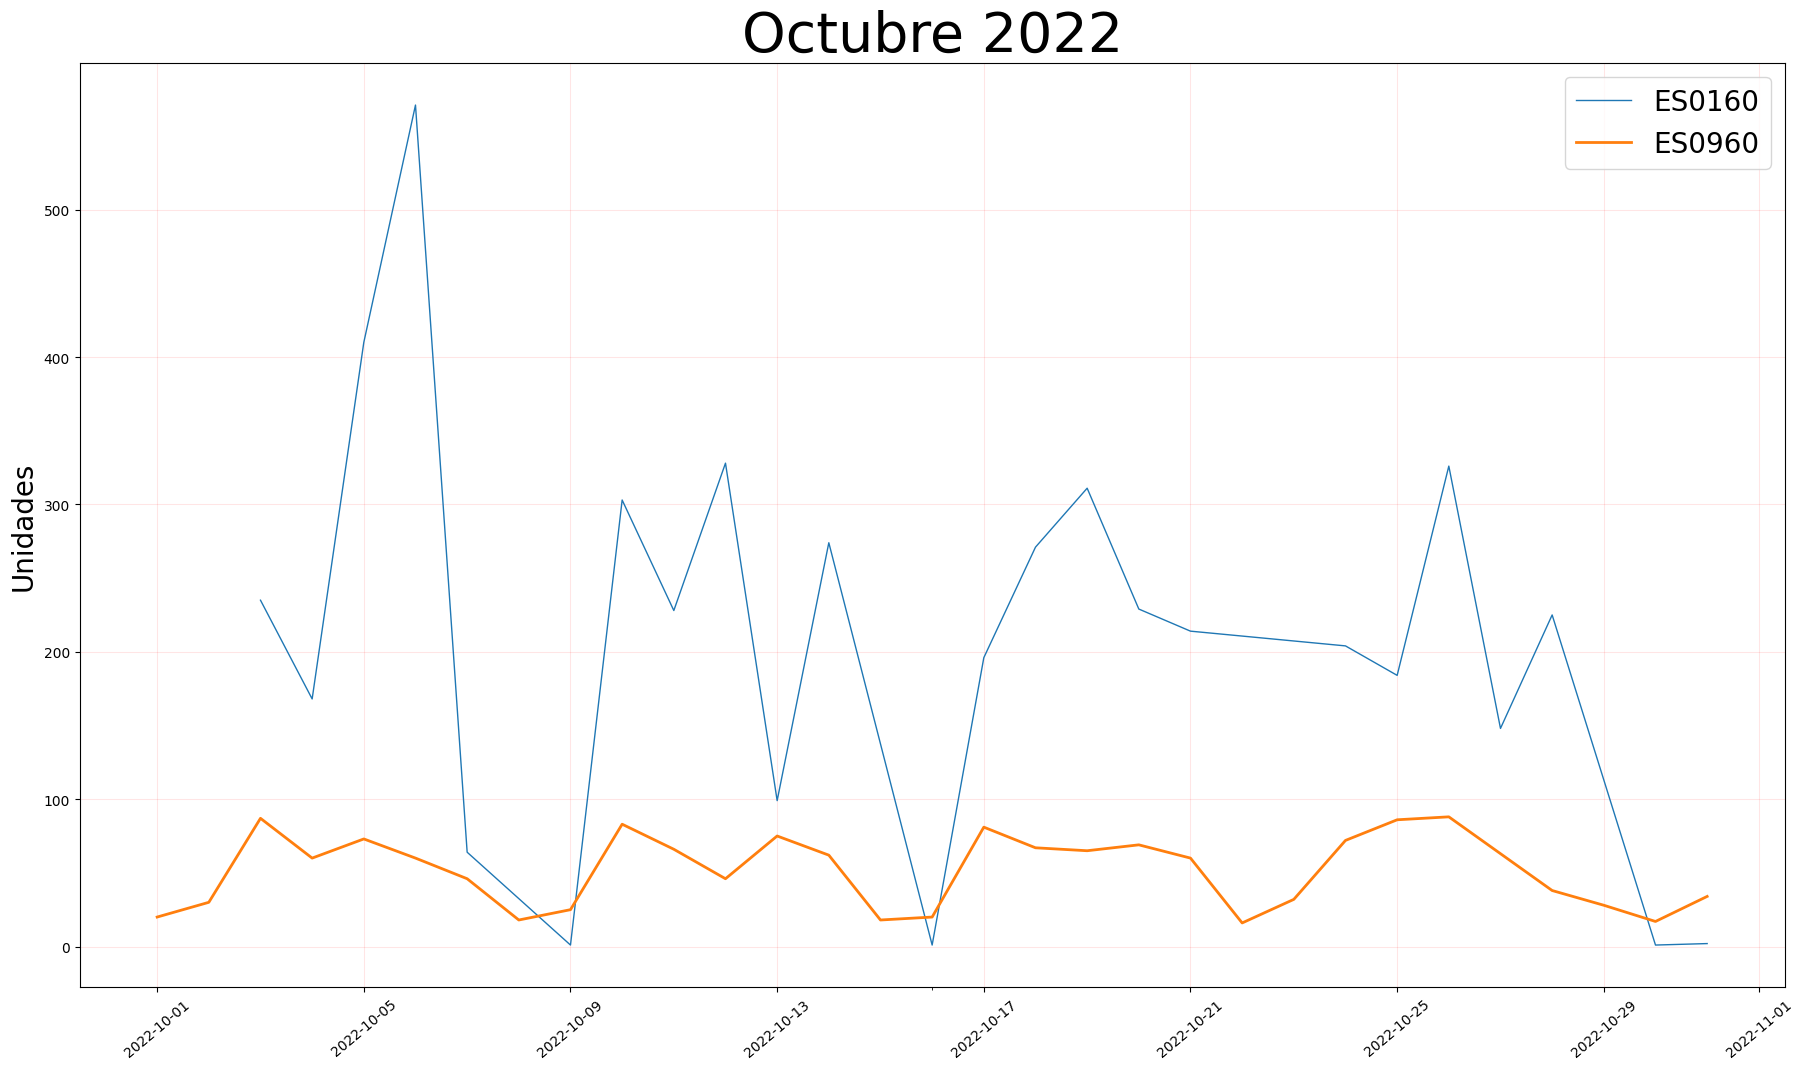

In [55]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
df1 = date_160_ordenado
df2 = date_960_ordenado
df1_año = df1.loc[(df1['date'] >= '2022-10-01') & (df1['date'] < '2022-11-01')]
df2_año = df2.loc[(df2['date'] >= '2022-10-01') & (df2['date'] < '2022-11-01')]
y = df1_año['unidad']
x = df1_año['date']
y1 = df2_año['unidad']
x1 = df2_año['date']
fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='ES0160')
ax.plot(x1, y1, linewidth=2.0,label='ES0960')
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Octubre 2022',fontsize = 40)
plt.grid()
ax.legend(fontsize = 20)
plt.savefig("static\Octubre 2022.jpg")
plt.show()

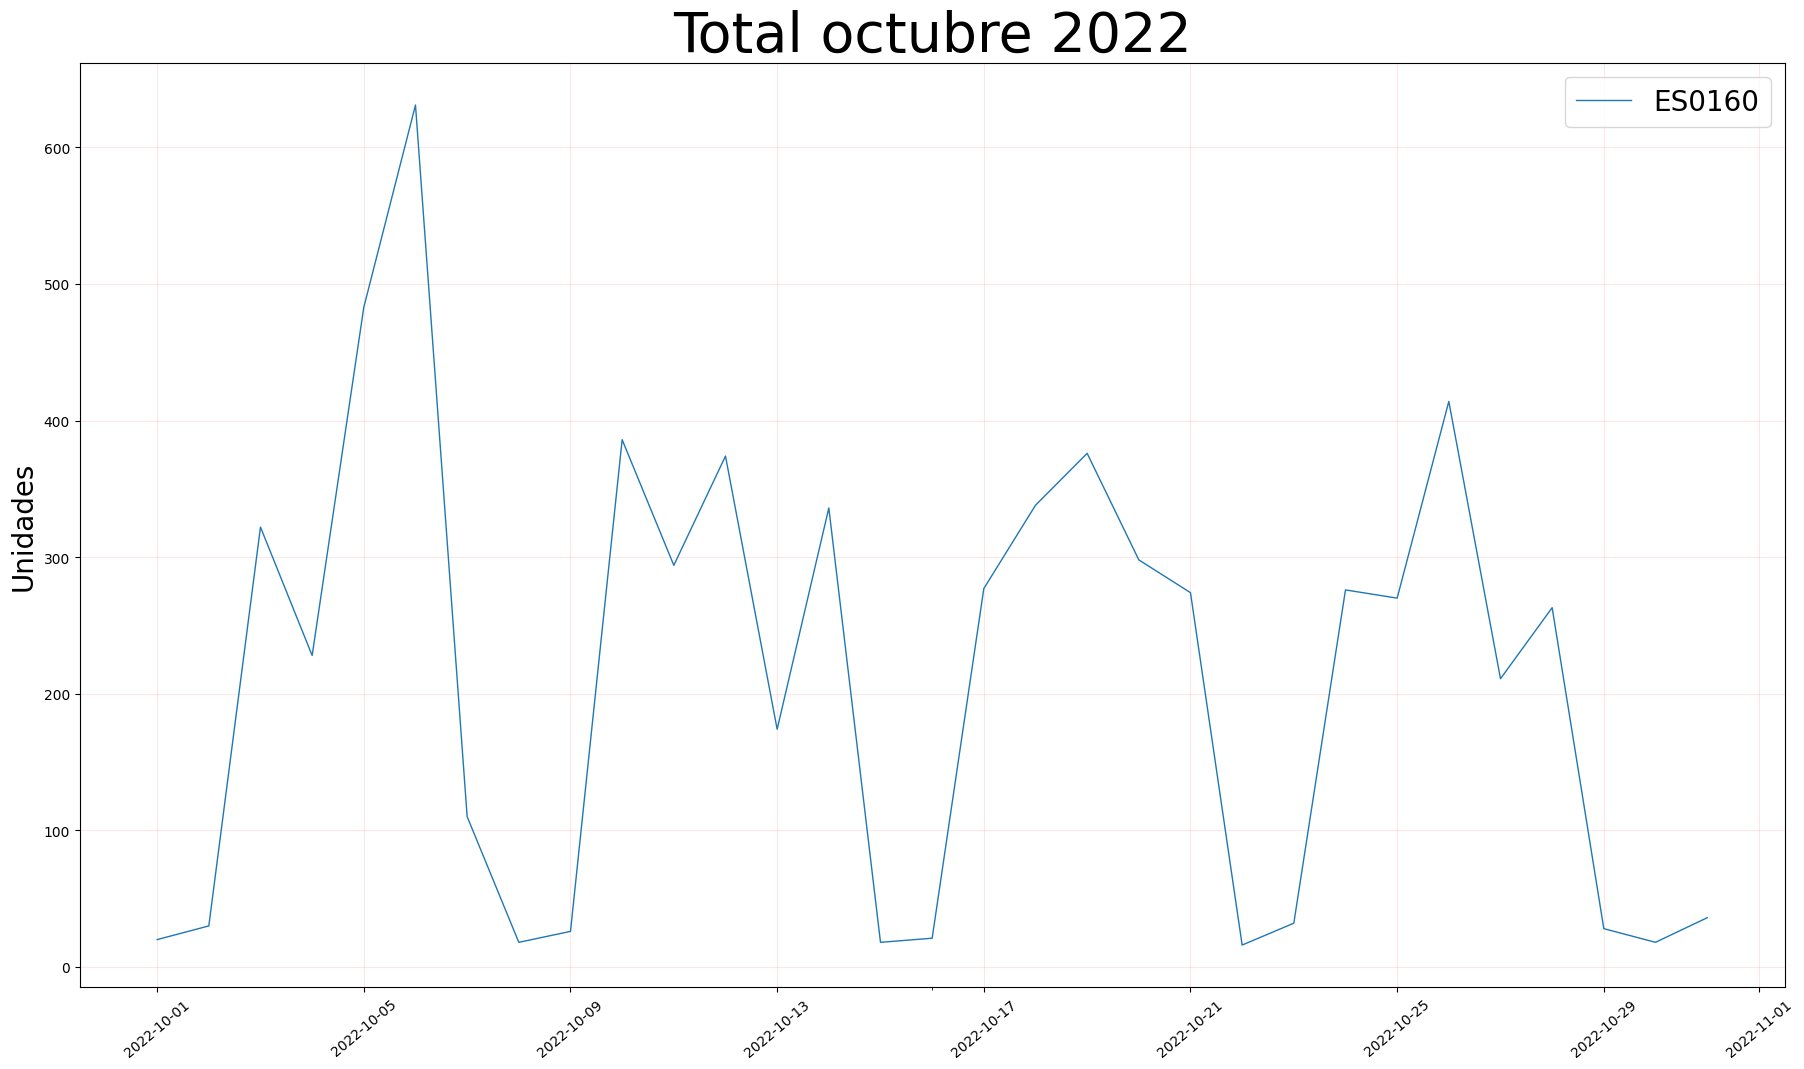

In [57]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
df1 = date_total_ordenado

df1_año = df1.loc[(df1['date'] >= '2022-10-01') & (df1['date'] < '2022-11-01')]

y = df1_año['unidad']
x = df1_año['date']

fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='ES0160')

ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Total octubre 2022',fontsize = 40)
plt.grid()
ax.legend(fontsize = 20)
plt.savefig("static\Octubre total 2022.jpg")
plt.show()

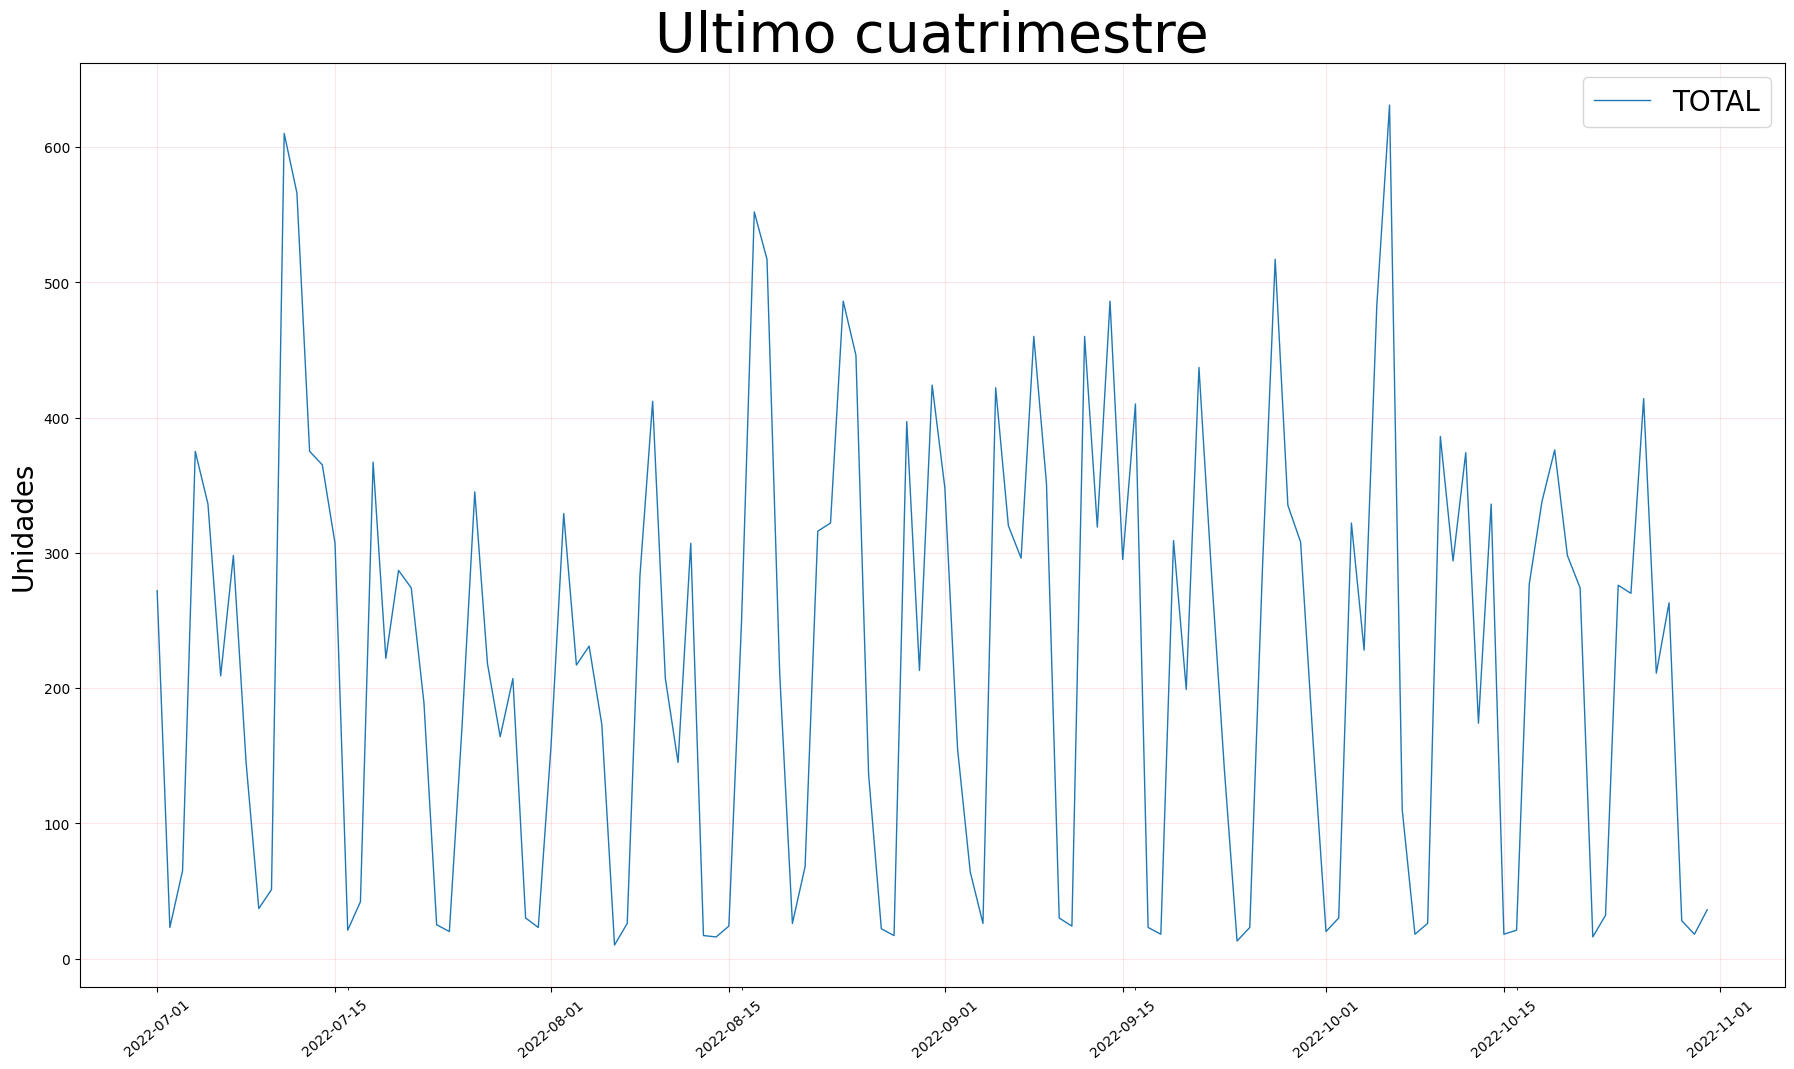

In [62]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
df1 = date_total_ordenado
df1_año = df1.loc[(df1['date'] >= '2022-07-01') & (df1['date'] < '2022-11-01')]
y = df1_año['unidad']
x = df1_año['date']
fig, ax = plt.subplots(figsize=(22,12))
#ax.step(x, y, linewidth=1.0)
#ax.stem(x, y)
ax.plot(x, y, linewidth=1.0 ,label='TOTAL')
ax.xaxis.set_tick_params(rotation=40)
ax.tick_params(grid_color='r', grid_alpha=0.1)
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.set_ylabel('Unidades',fontsize = 20)
ax.set_title('Ultimo cuatrimestre',fontsize = 40)
plt.grid()
ax.legend(fontsize = 20)
plt.savefig("static\\Ultime cuatrimestre.jpg")
plt.show()

## Elección de datos
Despues de ver los graficos podemos decidir que franja de datos elegir. En nuestro caso nos quedaremos con el ultimo cuatrimeste de ambos nodos.

In [66]:
df1_año

date  unidad
631  2022-07-01     272
1530 2022-07-02      23
1277 2022-07-03      65
344  2022-07-04     375
442  2022-07-05     336
...         ...     ...
809  2022-10-27     211
663  2022-10-28     263
1465 2022-10-29      28
1578 2022-10-30      18
1406 2022-10-31      36

[123 rows x 2 columns]

In [69]:
# guardamos el cuatrimeste para la predict
df1_año.to_excel('datos predict.xlsx')